## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings

### Set sompe options

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Loading the dataset

In [3]:
df = pd.read_csv('C:/Intel/stock_market/AAPL.csv',index_col=0)

## Insights from the data

In [4]:
df.shape

(3732, 63)

In [5]:
df.head()

Open  High   Low  Close(t)     Volume      SD20  Upper_Band  \
Date                                                                      
2005-10-17  6.66  6.69  6.50      6.60  154208600  0.169237    6.827473   
2005-10-18  6.57  6.66  6.44      6.45  152397000  0.168339    6.819677   
2005-10-19  6.43  6.78  6.32      6.78  252170800  0.180306    6.861112   
2005-10-20  6.72  6.97  6.71      6.93  339440500  0.202674    6.931847   
2005-10-21  7.02  7.03  6.83      6.87  199181500  0.216680    6.974860   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
Date                                                               
2005-10-17    6.150527          6.67          6.63          6.08   
2005-10-18    6.146323          6.60          6.67          6.63   
2005-10-19    6.139888          6.45          6.60          6.67   
2005-10-20    6.121153          6.78          6.45          6.60   
2005-10-21    6.108140          6.93          6.78          6.45   

            S_Close(t-5)  S_Open(t-1)    MA5   MA10    MA20    MA50    MA200  \
Date                                                                           
2005-10-17          6.22         6.67  6.470  6.444  6.4890  6.0978  5.14710   
2005-10-18          6.37         6.66  6.486  6.425  6.4830  6.1214  5.15980   
2005-10-19          6.08         6.57  6.626  6.451  6.5005  6.1488  5.17395   
2005-10-20          6.63         6.43  6.686  6.506  6.5265  6.1802  5.18870   
2005-10-21          6.67         6.72  6.726  6.560  6.5415  6.2090  5.20315   

               EMA10     EMA20     EMA50    EMA100    EMA200      MACD  \
Date                                                                     
2005-10-17  6.523675  6.523675  6.523675  6.523675  6.523675  0.108024   
2005-10-18  6.499117  6.499117  6.499117  6.499117  6.499117  0.098400   
2005-10-19  6.592744  6.592744  6.592744  6.592744  6.592744  0.116064   
2005-10-20  6.705163  6.705163  6.705163  6.705163  6.705163  0.140547   
2005-10-21  6.760109  6.760109  6.760109  6.760109  6.760109  0.153340   

            MACD_EMA       ATR        ADX          CCI       ROC        RSI  \
Date                                                                          
2005-10-17  0.126360  0.226843  25.267370  1333.333333 -1.785714  56.769238   
2005-10-18  0.120768  0.226355  23.873006  1333.333333 -2.861446  52.468220   
2005-10-19  0.119827  0.243043  22.578240  1333.333333  3.987730  59.701770   
2005-10-20  0.123971  0.244255  22.190130  1333.333333  8.620690  62.495670   
2005-10-21  0.129845  0.241094  22.063526  1333.333333  8.530806  60.683333   

            William%R       SO%K      STD5  ForceIndex1  ForceIndex20  \
Date                                                                    
2005-10-17 -25.000000  75.000000  0.050372  -10794602.0    15420860.0   
2005-10-18 -41.304348  58.695652  0.052096  -22859550.0   -18287640.0   
2005-10-19  -5.434783  94.565217  0.047023   83216364.0    88259780.0   
2005-10-20  -3.773585  96.226415  0.028919   50916075.0   176509060.0   
2005-10-21 -14.285714  85.714286  0.030048  -11950890.0    59754450.0   

              Date_col  Day  DayofWeek  DayofYear  Week  Is_month_end  \
Date                                                                    
2005-10-17  2005-10-17   17          0        290    42             0   
2005-10-18  2005-10-18   18          1        291    42             0   
2005-10-19  2005-10-19   19          2        292    42             0   
2005-10-20  2005-10-20   20          3        293    42             0   
2005-10-21  2005-10-21   21          4        294    42             0   

            Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
Date                                                                        
2005-10-17               0               0                 0            0   
2005-10-18               0               0                 0            0   
2005-10-19               0               0 

In [30]:
df.sample(10)

Open    High     Low  Close(t)     Volume      SD20  Upper_Band  \
Date                                                                            
2008-08-13   21.97   22.22   21.71     22.13  210586600  0.889740   22.027481   
2009-04-23   15.63   15.70   15.25     15.48  236289200  0.769528   15.879556   
2018-02-13  156.75  159.46  156.46    159.07   32549200  7.610695  177.071890   
2015-08-26   98.96  101.55   97.08    101.37   96774600  4.715145  114.931289   
2017-04-26  137.66  137.78  136.62    136.90   20041200  1.175198  138.562396   
2009-05-22   15.31   15.33   15.03     15.12   74499600  0.444736   16.492473   
2019-01-29  152.88  154.72  150.79    151.35   41587200  3.824532  157.525564   
2010-05-17   31.44   31.63   30.58     31.38  190708700  1.085359   34.056718   
2018-03-06  172.20  172.53  170.48    171.00   23788500  7.446904  179.589309   
2019-01-17  150.88  154.26  149.96    152.50   29821200  4.468298  158.780596   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
Date                                                               
2008-08-13   18.468519         21.82         21.43         20.93   
2009-04-23   12.801444         15.00         15.03         14.88   
2018-02-13  146.629110        157.49        151.39        149.56   
2015-08-26   96.070711         95.87         95.29         97.73   
2017-04-26  133.861604        137.71        136.86        135.56   
2009-05-22   14.713527         15.33         15.54         15.73   
2019-01-29  142.227436        152.93        154.36        149.41   
2010-05-17   29.715282         31.33         31.89         32.35   
2018-03-06  149.801691        171.15        170.55        169.38   
2019-01-17  140.907404        151.60        149.77        146.77   

            S_Close(t-5)  S_Open(t-1)      MA5     MA10      MA20      MA50  \
Date                                                                          
2008-08-13         20.27        21.42   21.300   20.448   20.2480   21.1458   
2009-04-23         14.99        15.14   15.126   14.935   14.3405   12.7270   
2018-02-13        157.16       153.41  154.260  155.717  161.8505  164.6444   
2015-08-26        106.28       102.68   98.872  103.014  105.5010  111.7930   
2017-04-26        134.04       137.12  136.550  135.598  136.2120  133.8560   
2009-05-22         15.11        15.45   15.470   15.375   15.6030   14.5458   
2019-01-29        150.00       152.43  151.730  151.596  149.8765  160.4350   
2010-05-17         31.35        31.50   31.724   31.302   31.8860   30.0172   
2018-03-06        172.66       169.59  170.896  170.278  164.6955  165.5608   
2019-01-17        150.49       149.78  149.930  148.745  149.8440  166.8350   

                MA200       EMA10       EMA20       EMA50      EMA100  \
Date                                                                    
2008-08-13   20.26000   21.399154   21.399154   21.399154   21.399154   
2009-04-23   14.23480   15.127784   15.127784   15.127784   15.127784   
2018-02-13  153.69350  156.025239  156.025239  156.025239  156.025239   
2015-08-26  111.44650   99.818462   99.818462   99.818462   99.818462   
2017-04-26  113.44255  136.573822  136.573822  136.573822  136.573822   
2009-05-22   13.73755   15.343048   15.343048   15.343048   15.343048   
2019-01-29  186.62665  151.864695  151.864695  151.864695  151.864695   
2010-05-17   25.27800   31.502240   31.502240   31.502240   31.502240   
2018-03-06  155.39830  170.796736  170.796736  170.796736  170.796736   
2019-01-17  187.13655  150.610917  150.610917  150.610917  150.610917   

                EMA200      MACD  MACD_EMA       ATR        ADX          CCI  \
Date                                                                           
2008-08-13   21.399154  0.083766 -0.253229  0.785796  23.444373  1333.333333   
2009-04-23   15.127784  0.729123  0.724363  0.498605  39.218339  1333.333333   
2018-02-13  156.025239 -3.352381 -2.890014  4.204520  34.153552  1333.333333  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 2005-10-17 to 2020-08-13
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3732 non-null   float64
 1   High              3732 non-null   float64
 2   Low               3732 non-null   float64
 3   Close(t)          3732 non-null   float64
 4   Volume            3732 non-null   int64  
 5   SD20              3732 non-null   float64
 6   Upper_Band        3732 non-null   float64
 7   Lower_Band        3732 non-null   float64
 8   S_Close(t-1)      3732 non-null   float64
 9   S_Close(t-2)      3732 non-null   float64
 10  S_Close(t-3)      3732 non-null   float64
 11  S_Close(t-5)      3732 non-null   float64
 12  S_Open(t-1)       3732 non-null   float64
 13  MA5               3732 non-null   float64
 14  MA10              3732 non-null   float64
 15  MA20              3732 non-null   float64
 16  MA50              3732 non-null 

In [32]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include='object')

In [33]:
print(num_col.shape)
print(cat_col.shape)

(3732, 62)
(3732, 1)


In [35]:
cat_col.columns

Index(['Date_col'], dtype='object')

### Numbr of unique values in data

In [89]:
df.nunique()

Open                3266
High                3230
Low                 3242
Close(t)            3202
Volume              3721
SD20                3729
Upper_Band          3729
Lower_Band          3729
S_Close(t-1)        3202
S_Close(t-2)        3202
S_Close(t-3)        3202
S_Close(t-5)        3202
S_Open(t-1)         3266
MA5                 3700
MA10                3706
MA20                3722
MA50                3721
MA200               3732
EMA10               3732
EMA20               3732
EMA50               3732
EMA100              3732
EMA200              3732
MACD                3732
MACD_EMA            3732
ATR                 3732
ADX                 3732
CCI                    3
ROC                 3724
RSI                 3711
William%R           3662
SO%K                3655
STD5                3731
ForceIndex1         3704
ForceIndex20        3730
Day                   31
DayofWeek              5
DayofYear            365
Week                  53
Is_month_end           2


### Drop the date col

In [4]:
df.drop(columns=['Date_col'],inplace=True)

In [37]:
df.shape

(3732, 62)

### Checking the null values in data

In [42]:
df.isnull().sum()

Open                0
High                0
Low                 0
Close(t)            0
Volume              0
SD20                0
Upper_Band          0
Lower_Band          0
S_Close(t-1)        0
S_Close(t-2)        0
S_Close(t-3)        0
S_Close(t-5)        0
S_Open(t-1)         0
MA5                 0
MA10                0
MA20                0
MA50                0
MA200               0
EMA10               0
EMA20               0
EMA50               0
EMA100              0
EMA200              0
MACD                0
MACD_EMA            0
ATR                 0
ADX                 0
CCI                 0
ROC                 0
RSI                 0
William%R           0
SO%K                0
STD5                0
ForceIndex1         0
ForceIndex20        0
Day                 0
DayofWeek           0
DayofYear           0
Week                0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Is_leap_ye

### Checking the duplication of data

In [60]:
df.duplicated().sum()

np.int64(0)

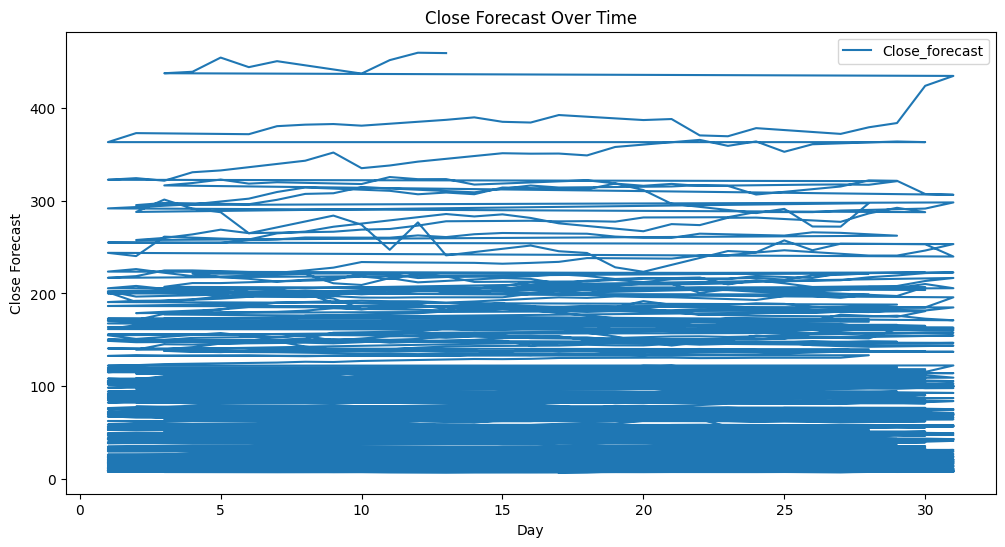

In [85]:
plt.figure(figsize=(12,6))
plt.plot(df['Day'], df['Close_forcast'], label='Close_forecast')
plt.xlabel('Day')
plt.ylabel('Close Forecast')
plt.title('Close Forecast Over Time')
plt.legend()
plt.show()

In [84]:
df.columns

Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
       'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close',
       'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [87]:
df.Is_month_end.unique()

array([0, 1])

### Checking the skewness of data

In [ ]:
from scipy import stats

In [55]:
df.shape

(3732, 62)

Skewness of Open: 1.4226639128021925


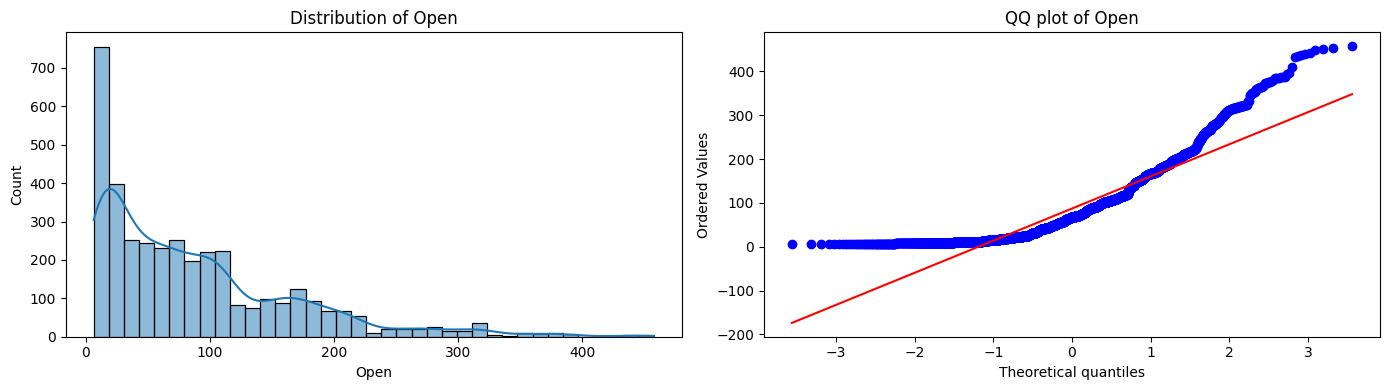

Skewness of High: 1.435352970367091


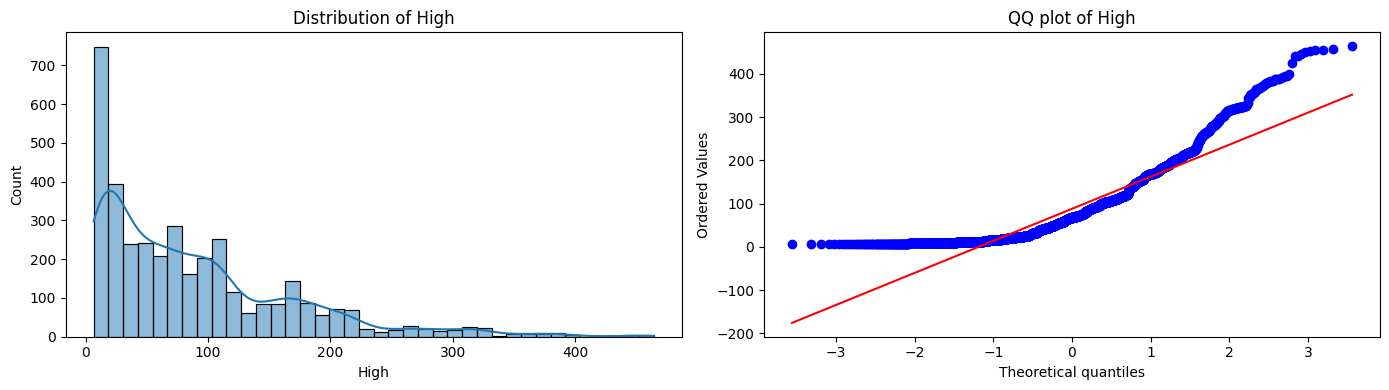

Skewness of Low: 1.415708066720838


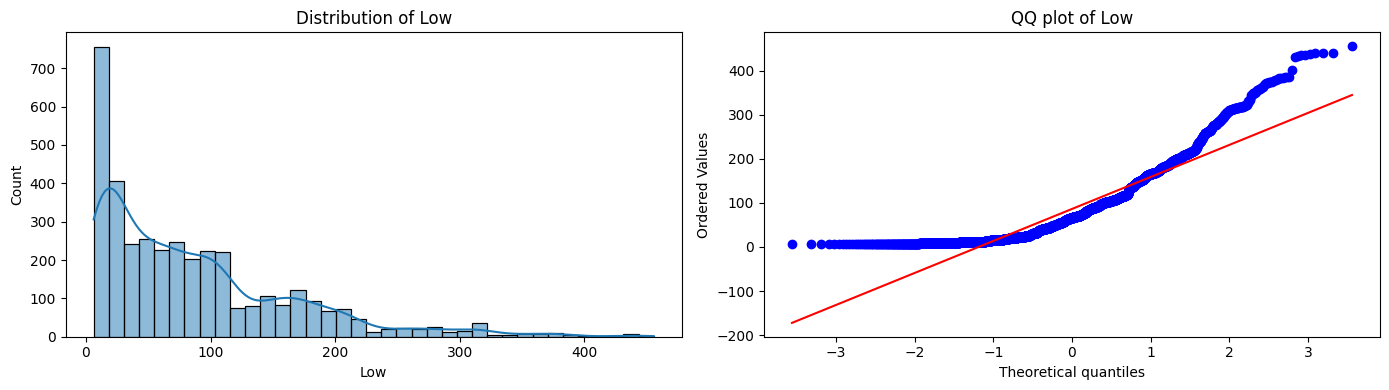

Skewness of Close(t): 1.4290338999562862


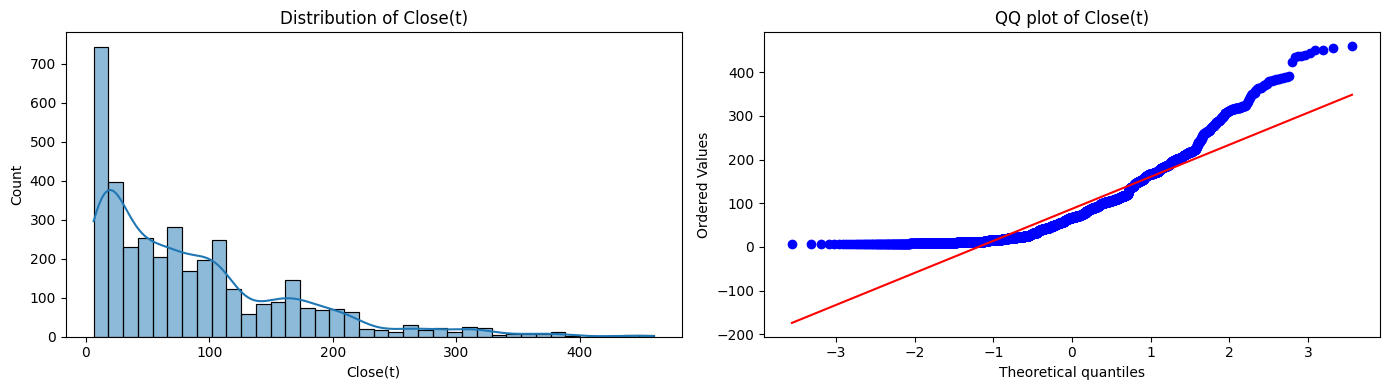

Skewness of Volume: 1.7802334609193253


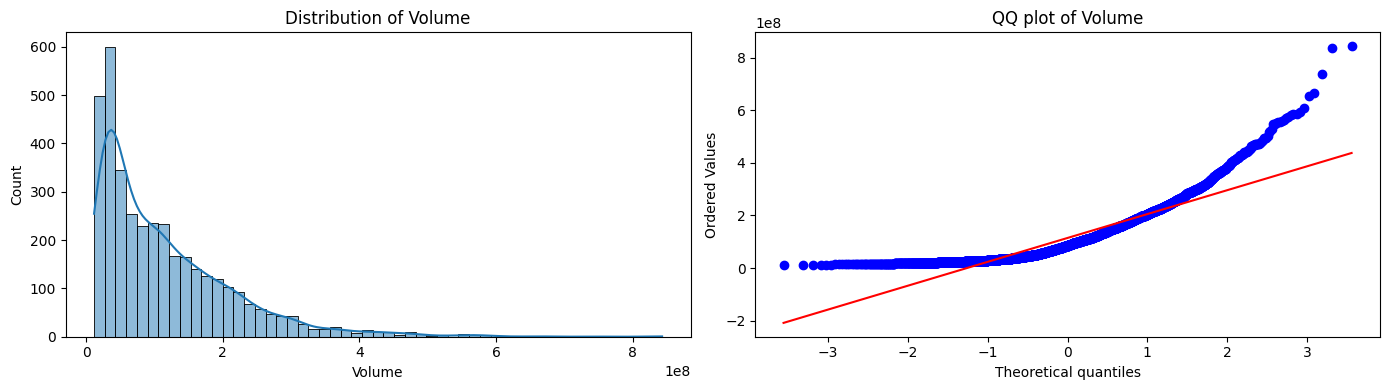

Skewness of SD20: 3.445825987996935


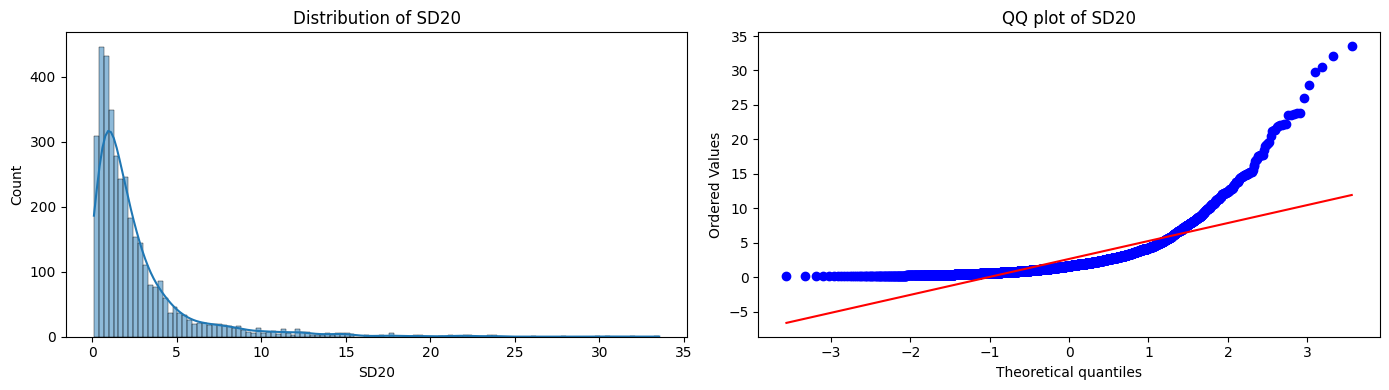

Skewness of Upper_Band: 1.4086736871561893


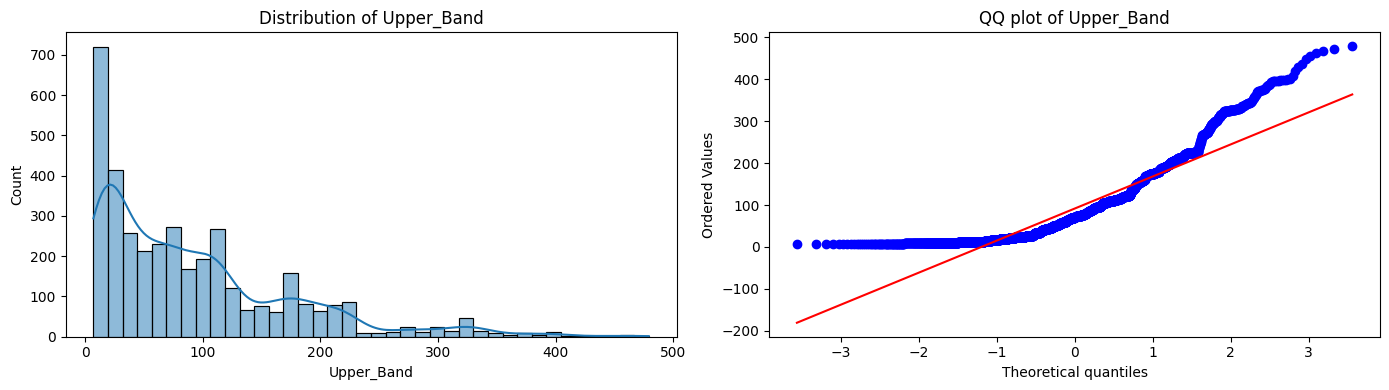

Skewness of Lower_Band: 1.2702109481836894


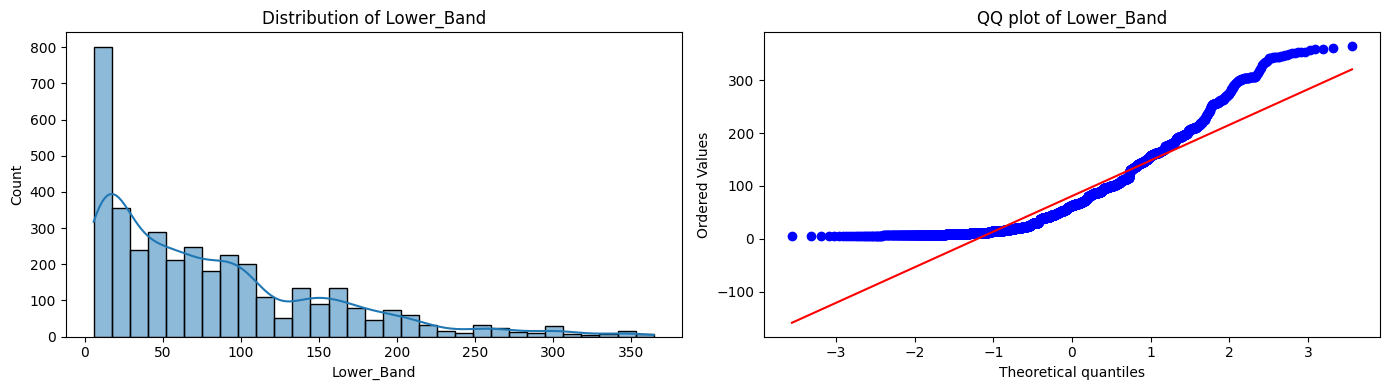

Skewness of S_Close(t-1): 1.4173804485479047


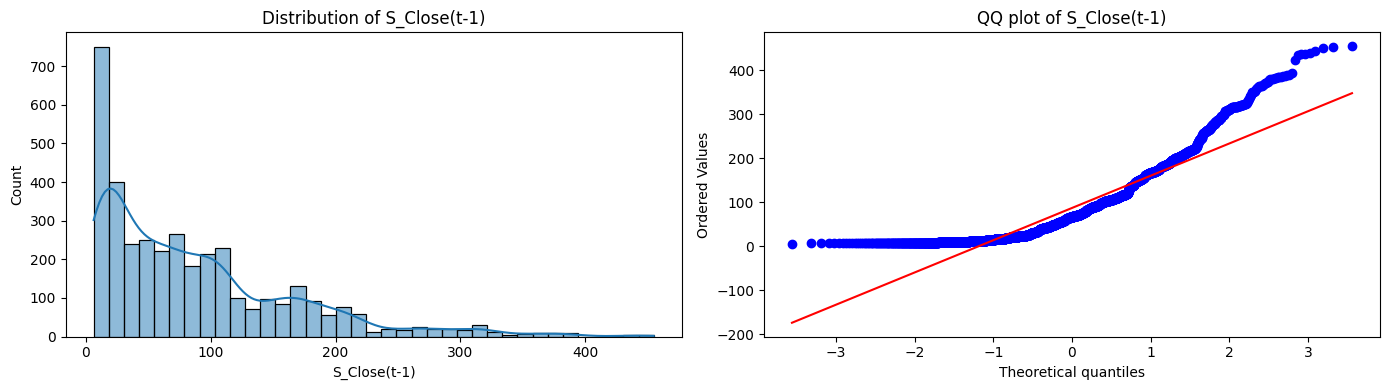

Skewness of S_Close(t-2): 1.4066227894648062


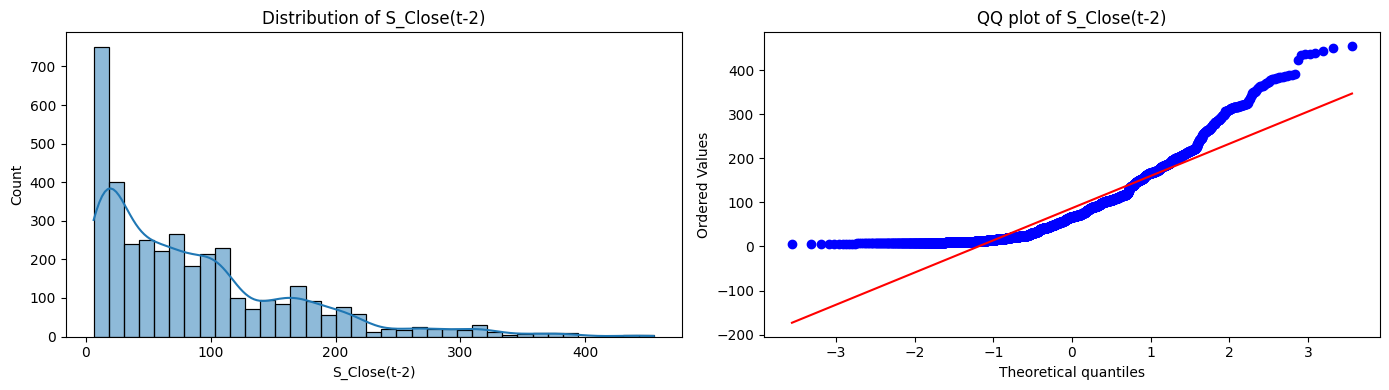

Skewness of S_Close(t-3): 1.3976023086011706


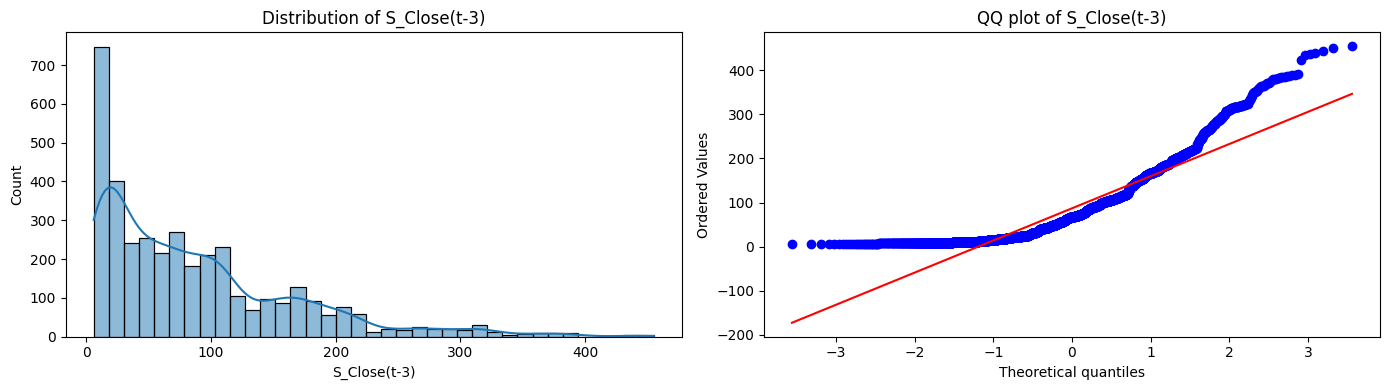

Skewness of S_Close(t-5): 1.3761253305601933


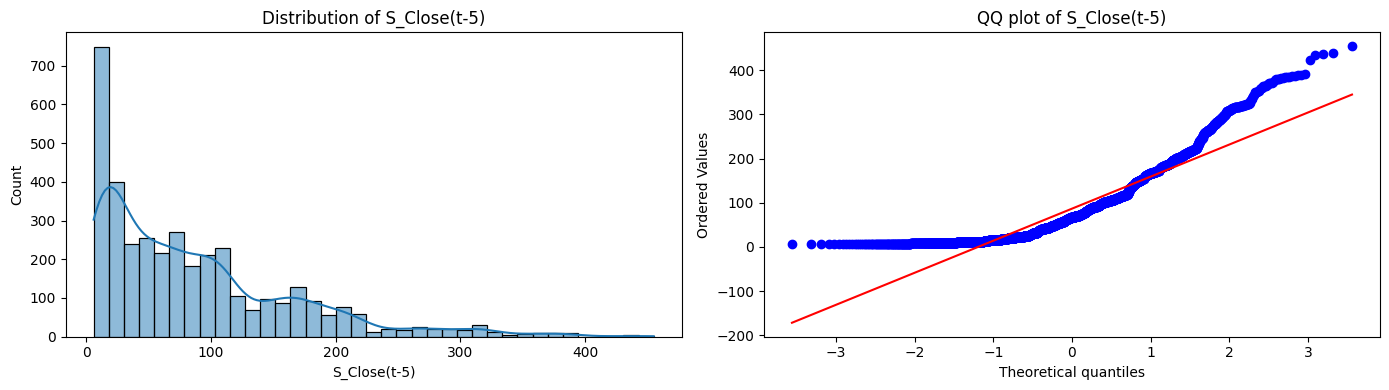

Skewness of S_Open(t-1): 1.4111705575182187


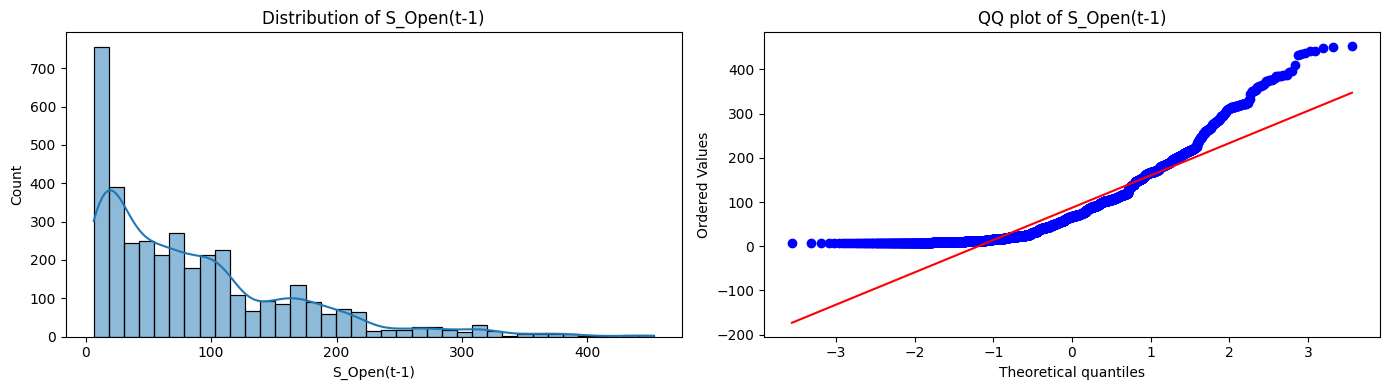

Skewness of MA5: 1.404883681618108


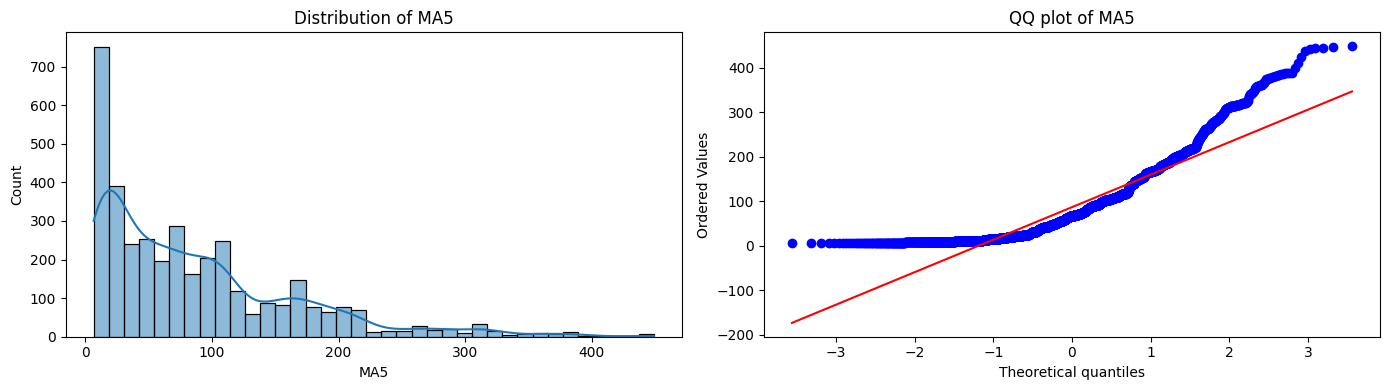

Skewness of MA10: 1.375640791704727


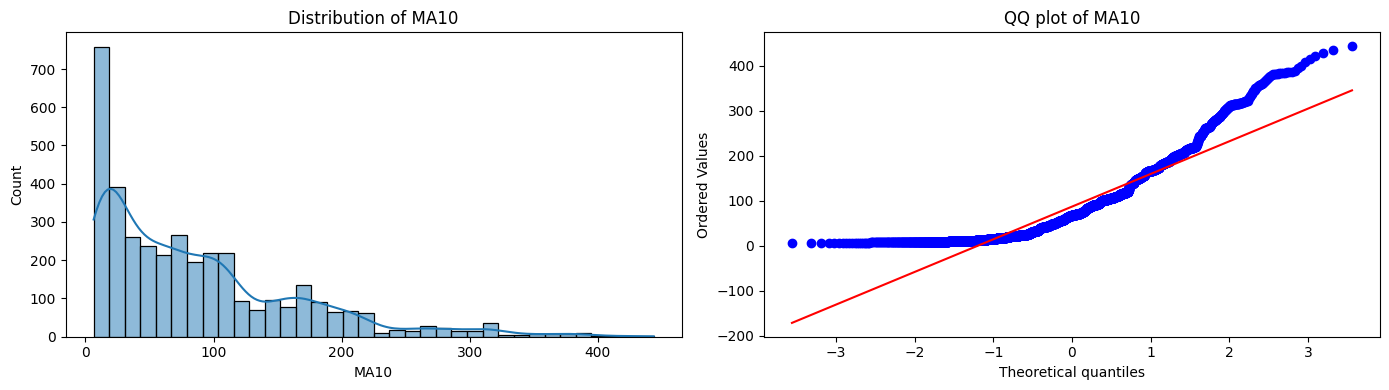

Skewness of MA20: 1.3349789265535863


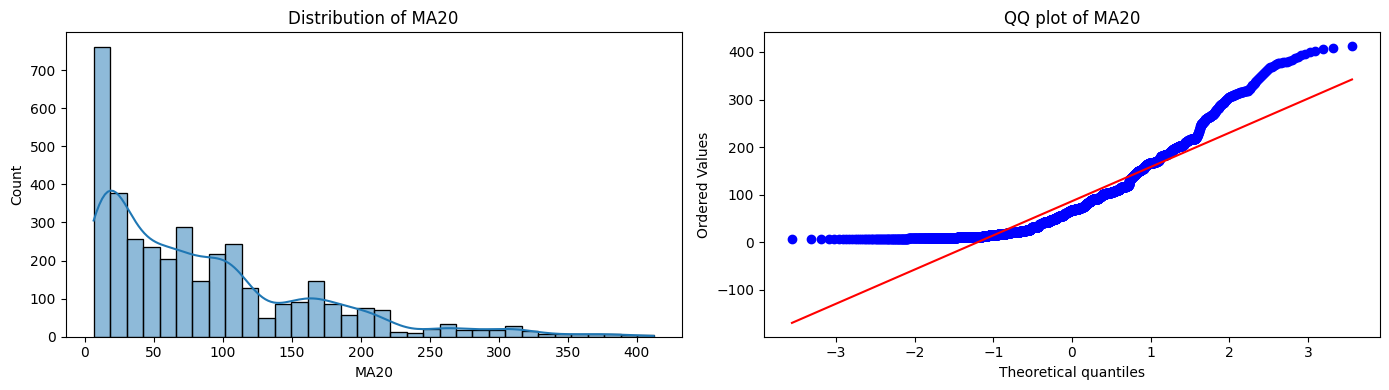

Skewness of MA50: 1.2374248457775272


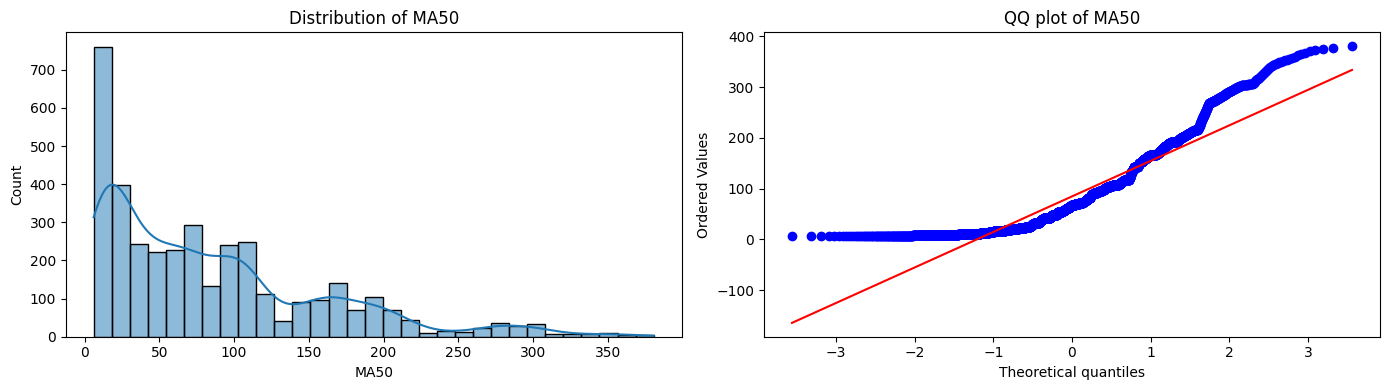

Skewness of MA200: 1.0279448918879746


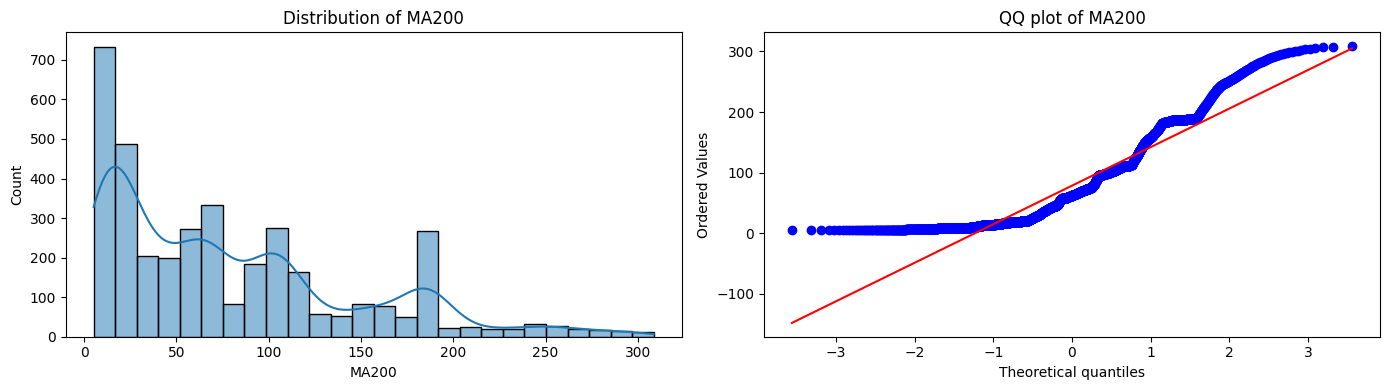

Skewness of EMA10: 1.40396169195404


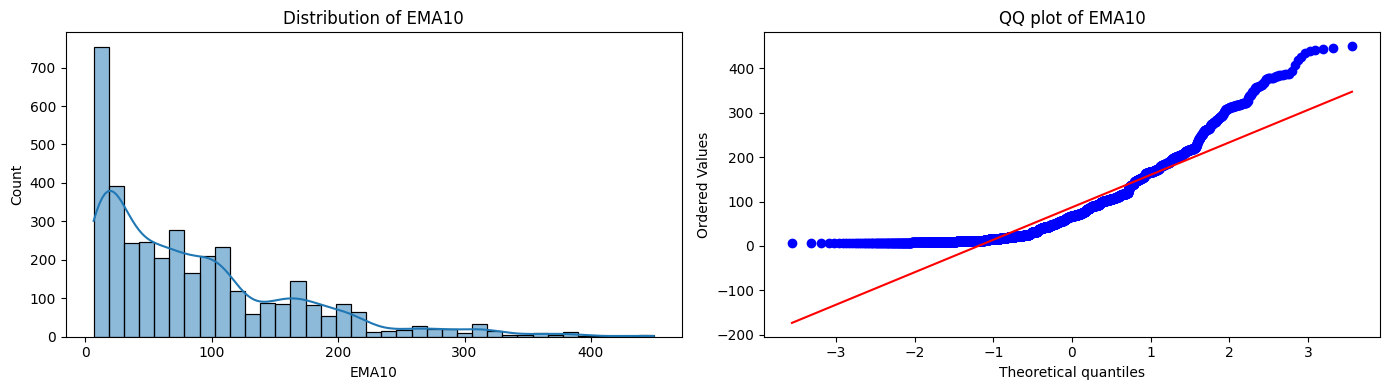

Skewness of EMA20: 1.40396169195404


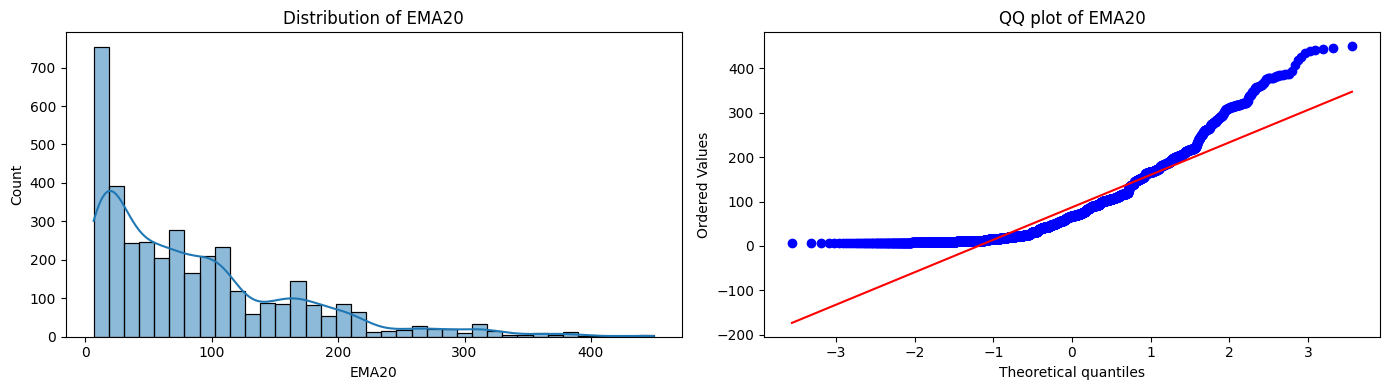

Skewness of EMA50: 1.40396169195404


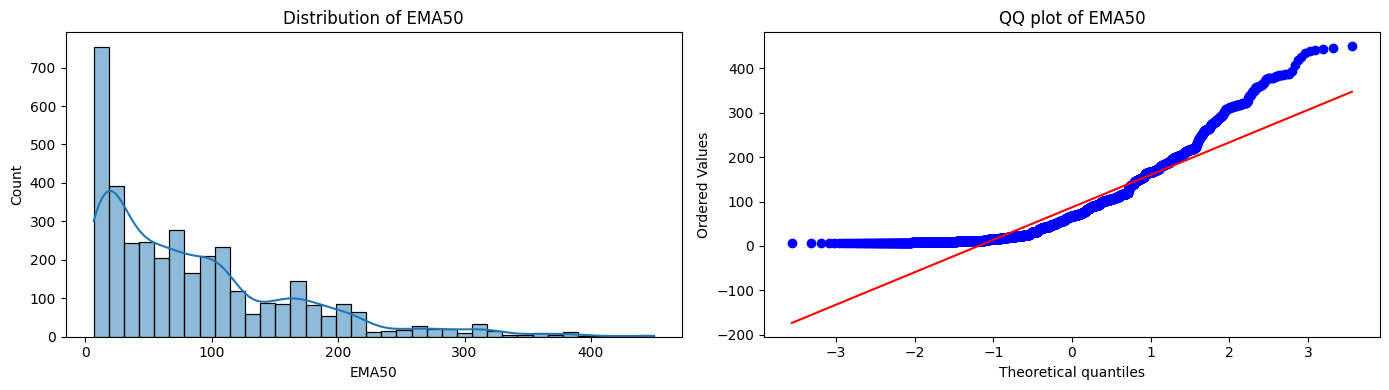

Skewness of EMA100: 1.40396169195404


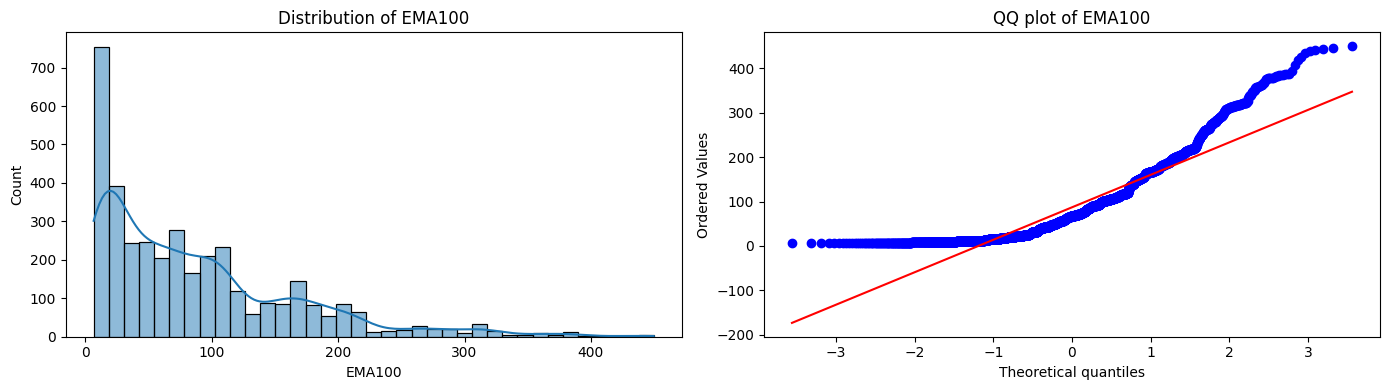

Skewness of EMA200: 1.40396169195404


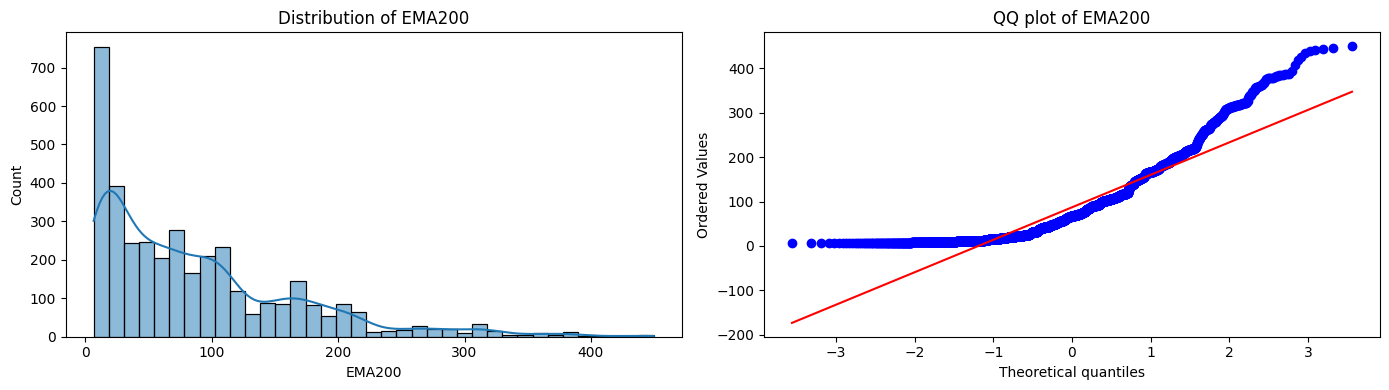

Skewness of MACD: 0.8240455681011235


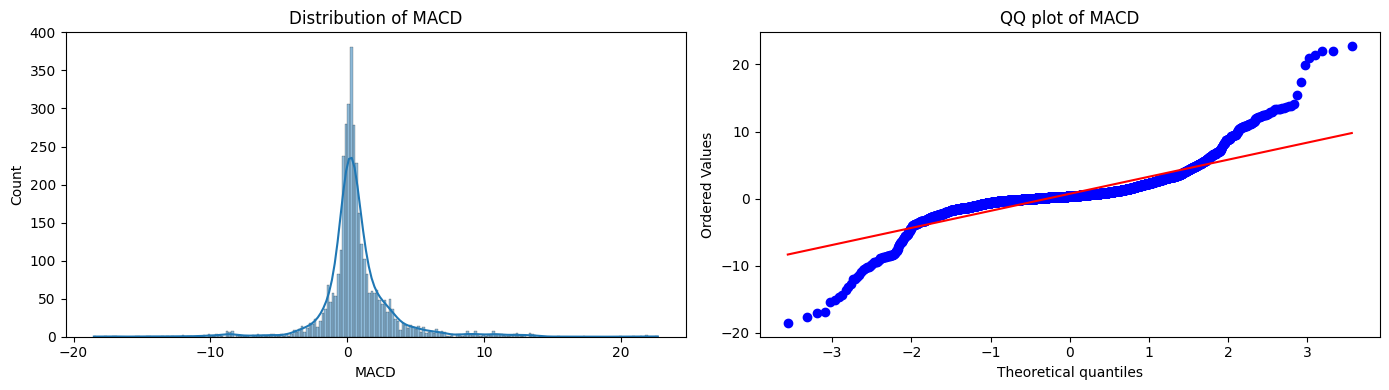

Skewness of MACD_EMA: 0.6731659282632192


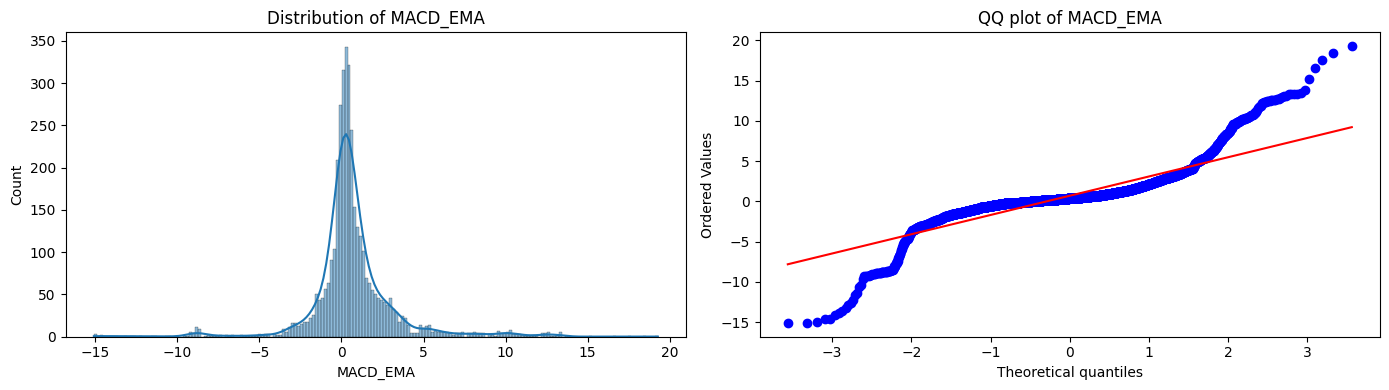

Skewness of ATR: 3.2944861021497003


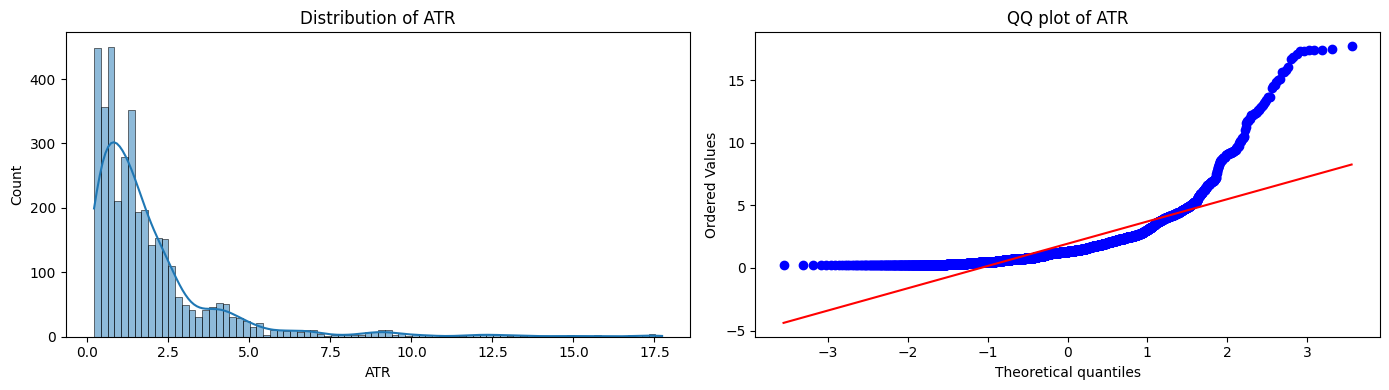

Skewness of ADX: 0.9363884407734501


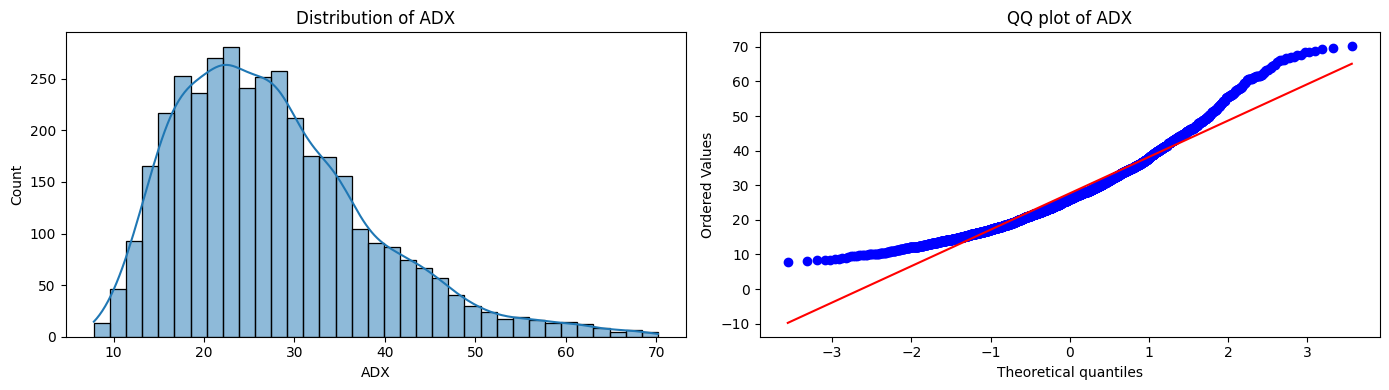

Skewness of CCI: 0.0


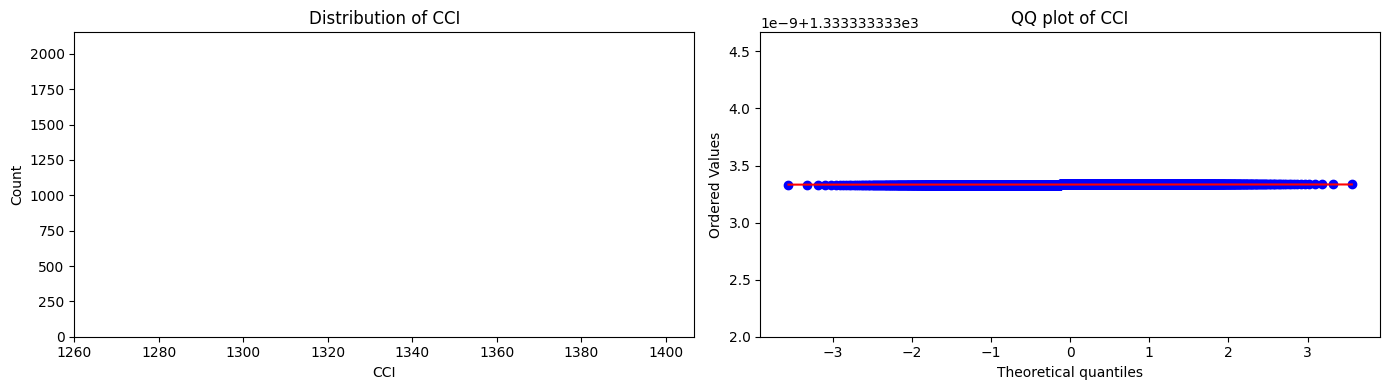

Skewness of ROC: -0.32522801399888884


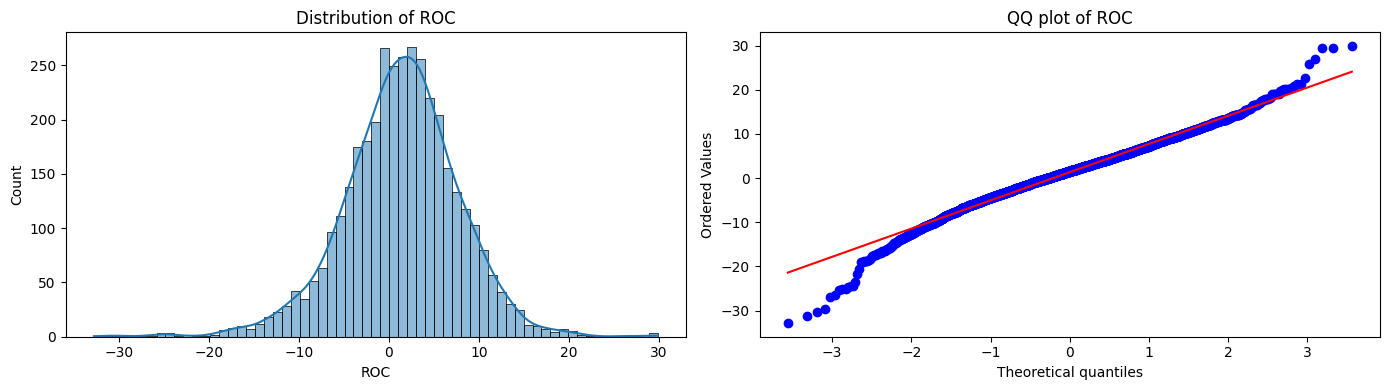

Skewness of RSI: -0.07077545741844977


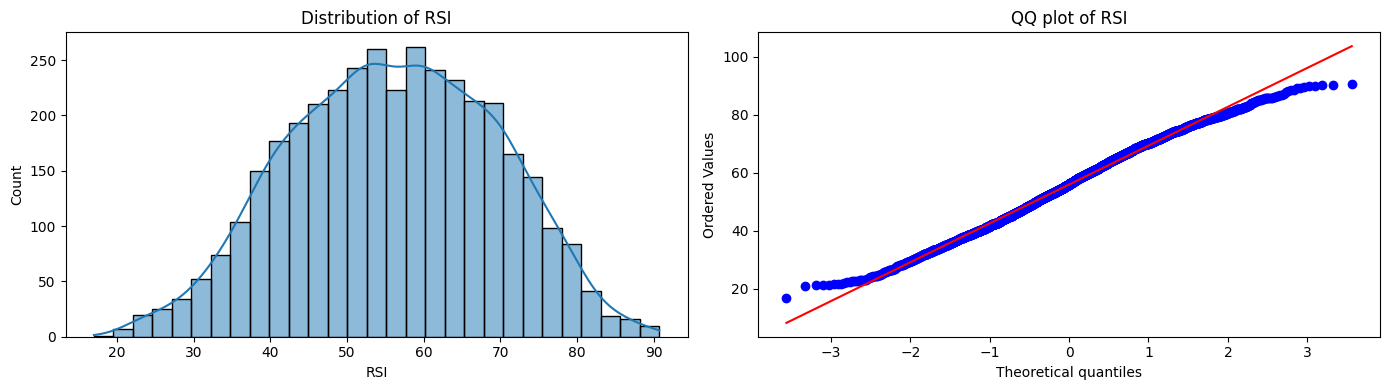

Skewness of William%R: -0.4543011873299124


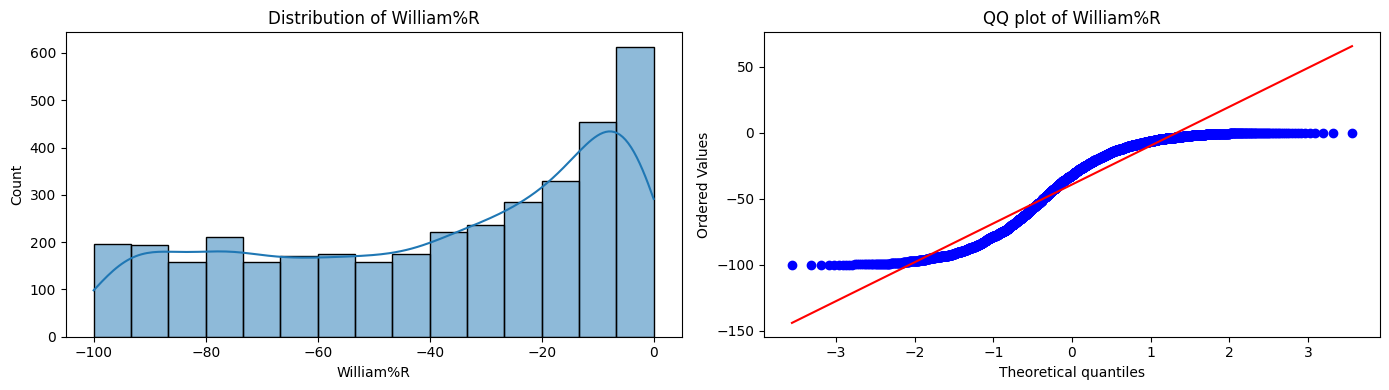

Skewness of SO%K: -0.45430118732991226


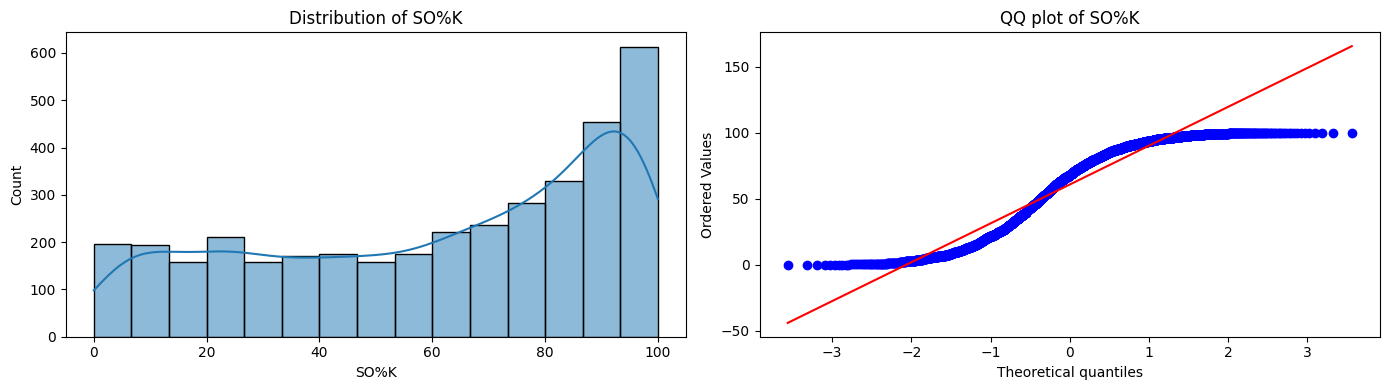

Skewness of STD5: 2.298378905549198


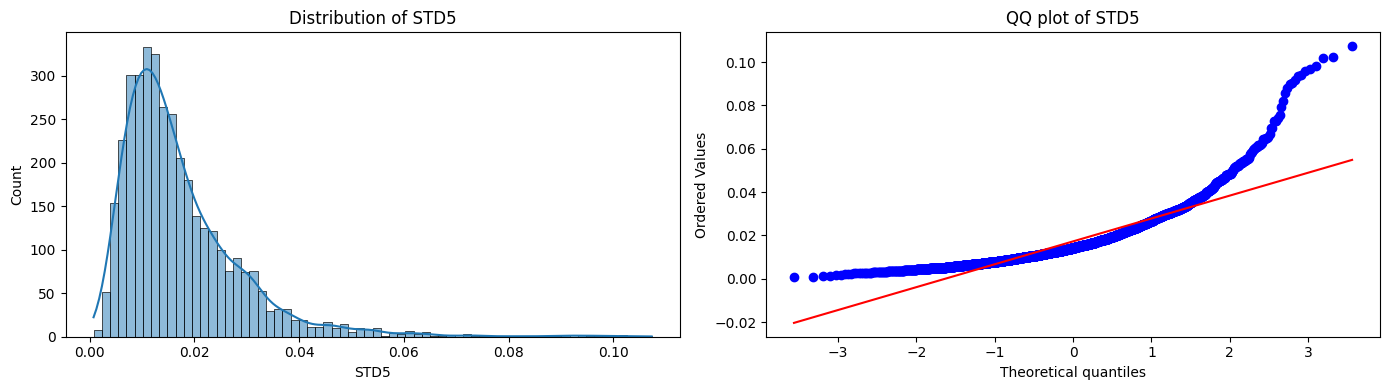

Skewness of ForceIndex1: -0.29864274998207224


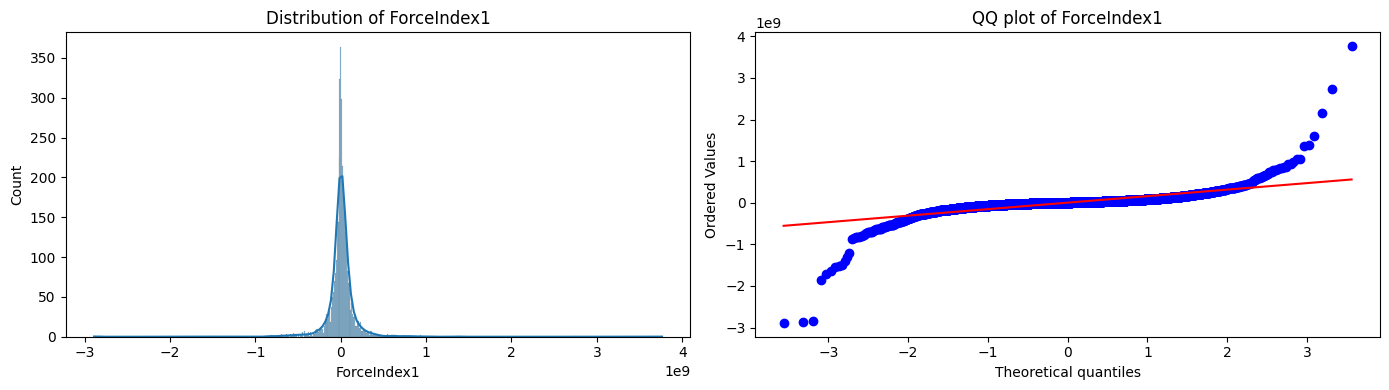

Skewness of ForceIndex20: -2.417274614202019


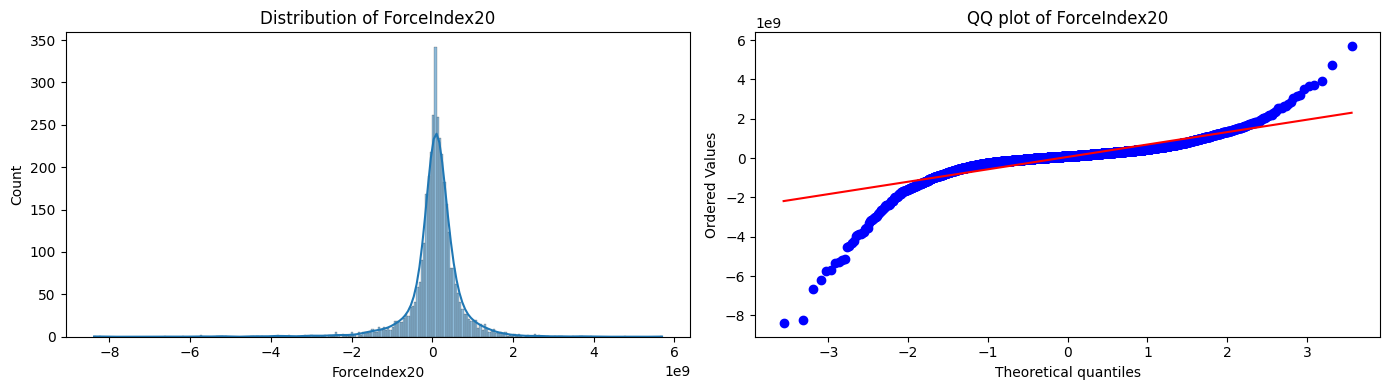

Skewness of Day: 0.01996916810269973


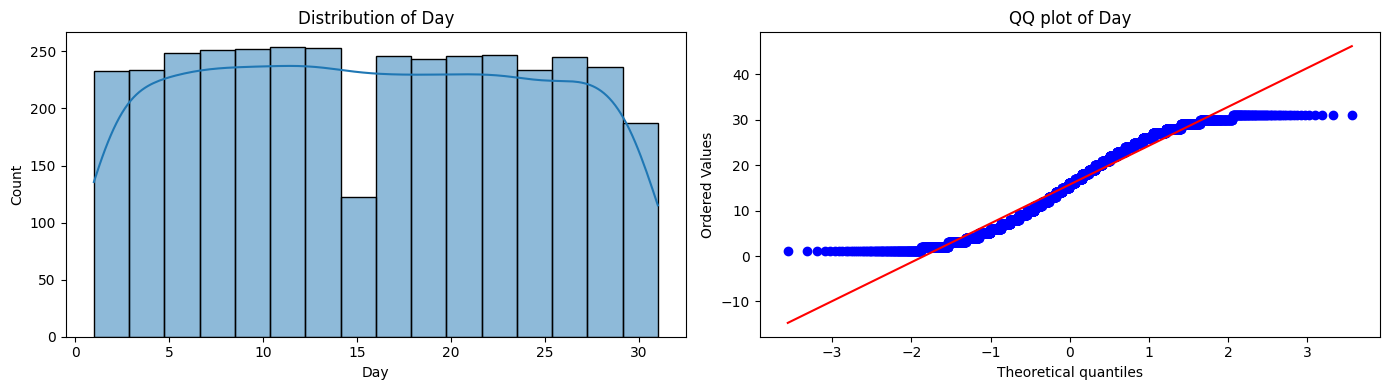

Skewness of DayofWeek: -0.012009292183616032


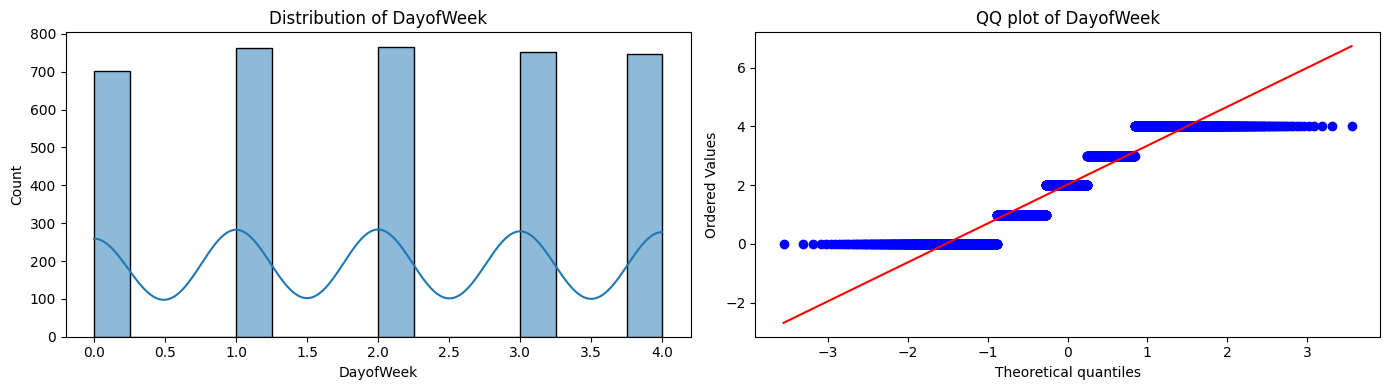

Skewness of DayofYear: 0.01310077350208458


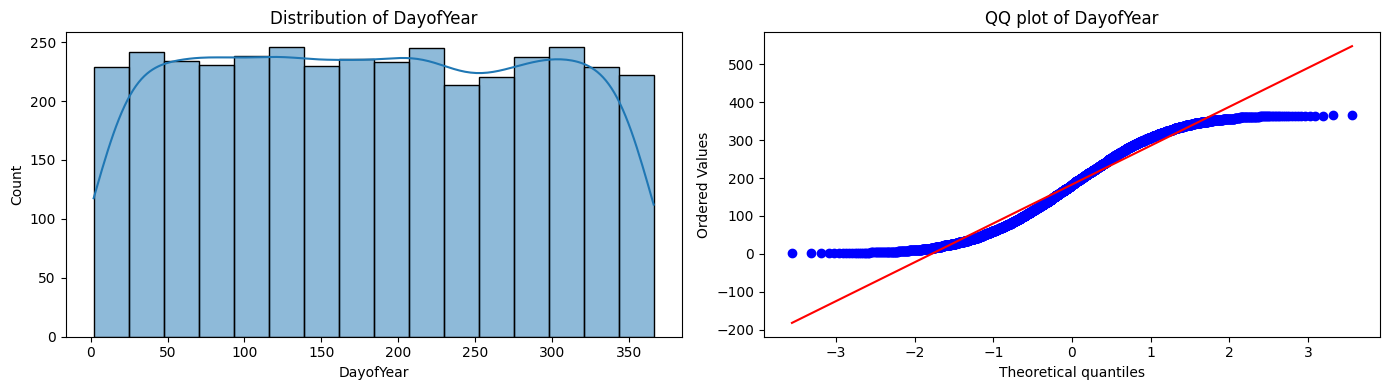

Skewness of Week: 0.011441632801883208


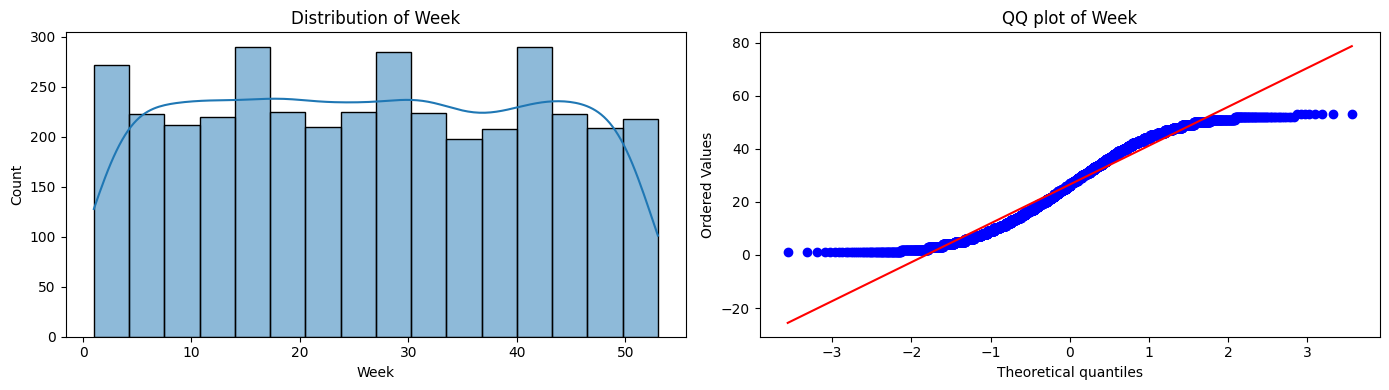

Skewness of Is_month_end: 5.164826302916483


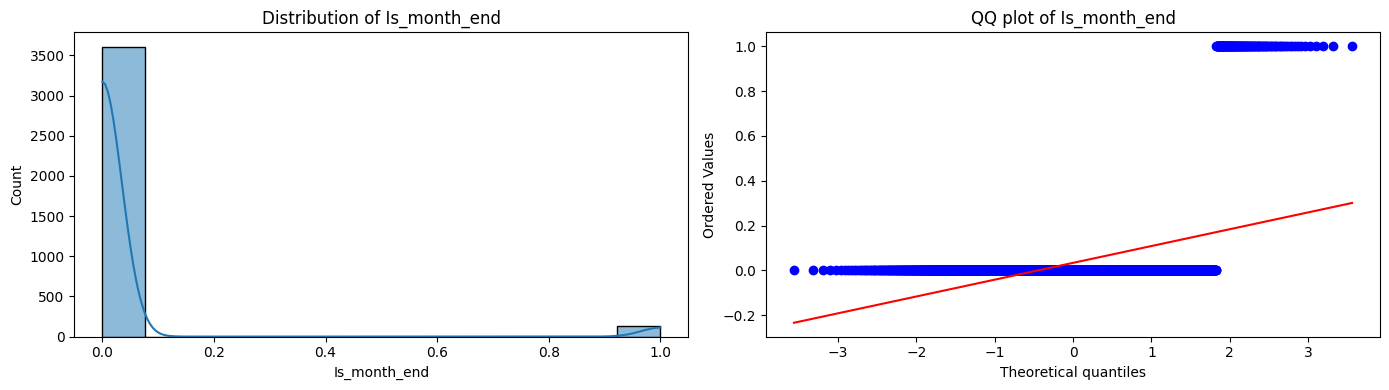

Skewness of Is_month_start: 5.484701654678187


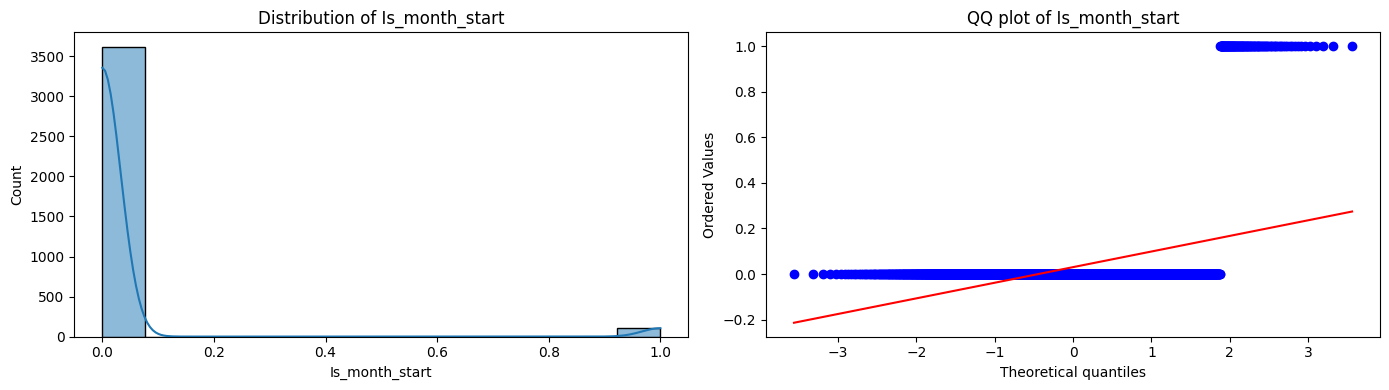

Skewness of Is_quarter_end: 9.632104727732598


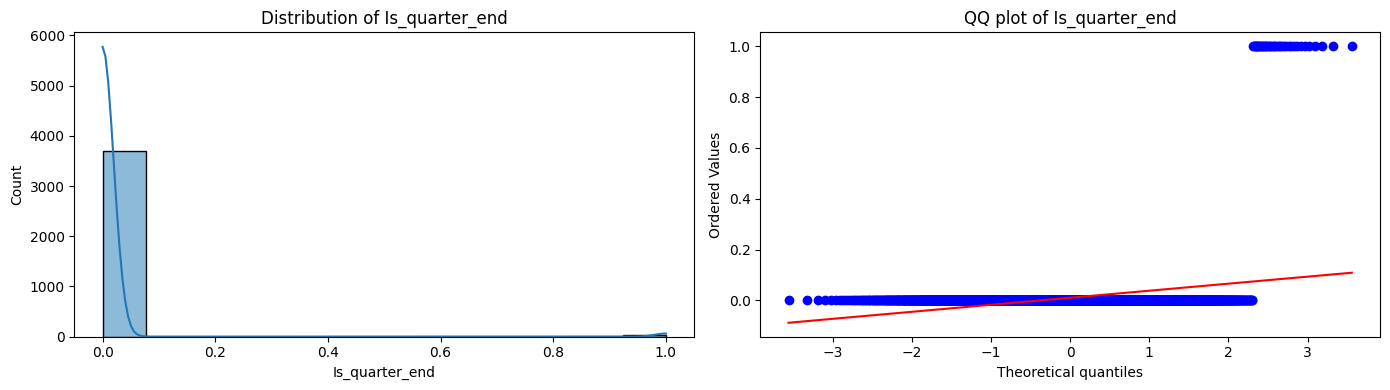

Skewness of Is_quarter_start: 11.022965501566418


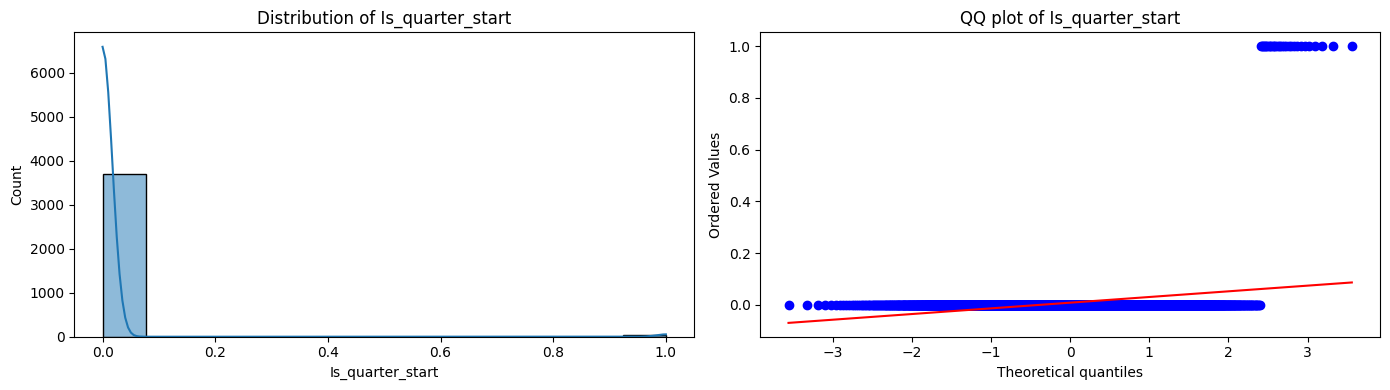

Skewness of Is_year_end: 19.24838928572815


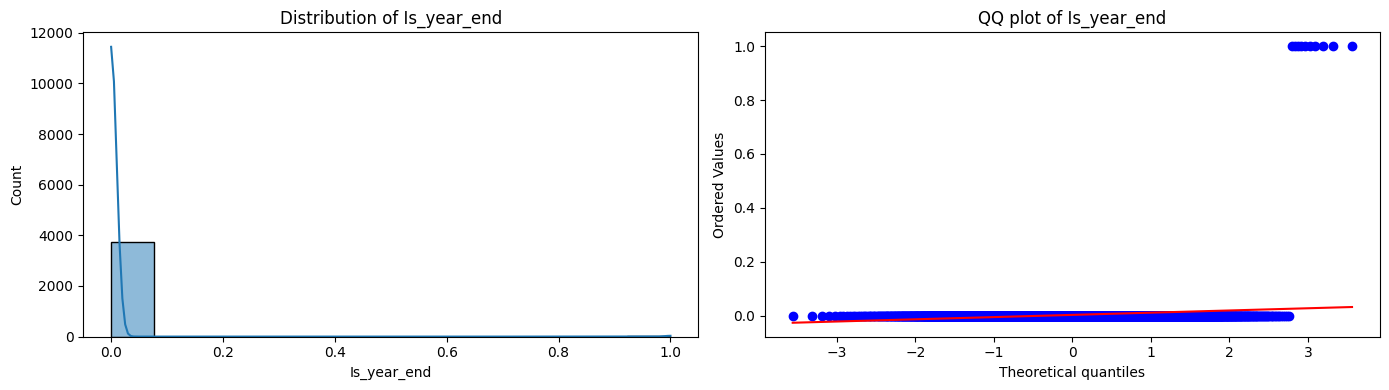

Skewness of Is_year_start: 0.0


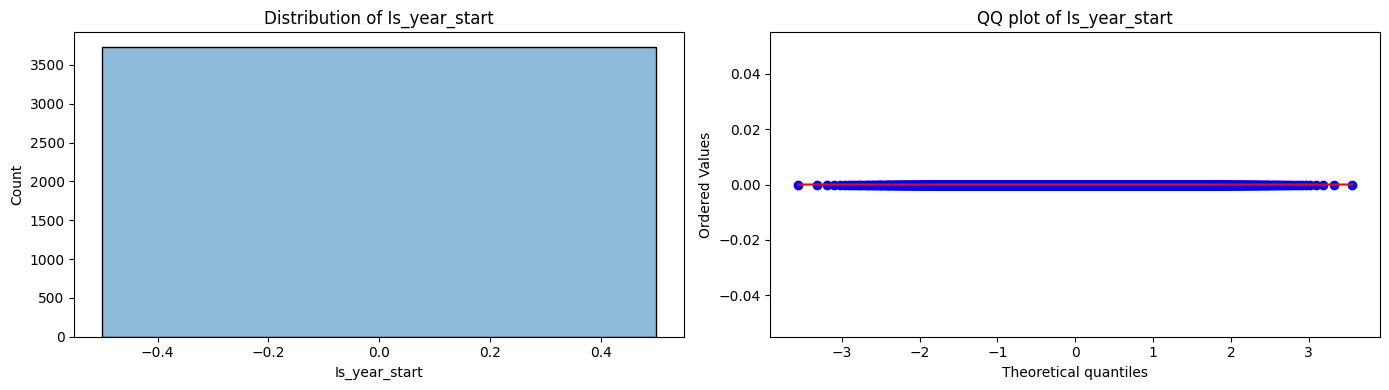

Skewness of Is_leap_year: 1.1919203809008465


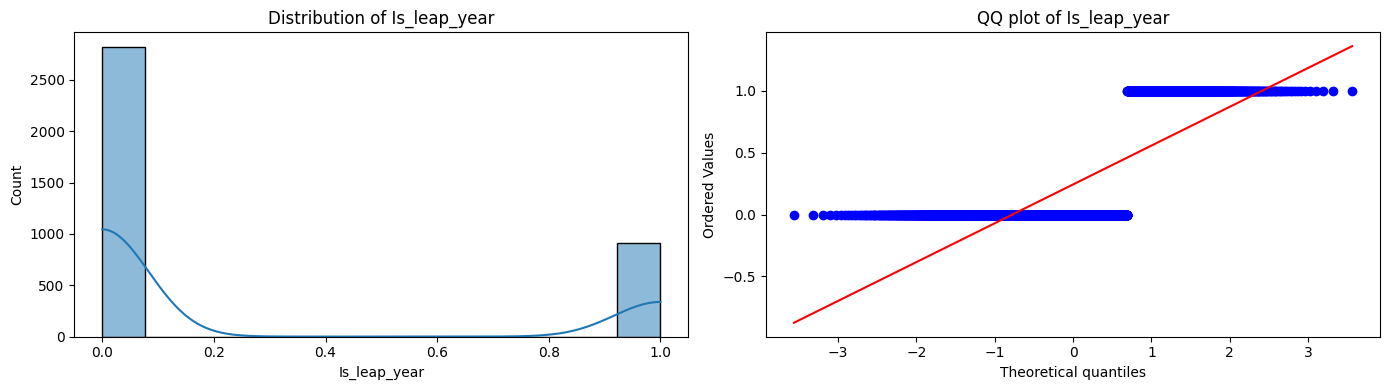

Skewness of Year: 0.002902939039676068


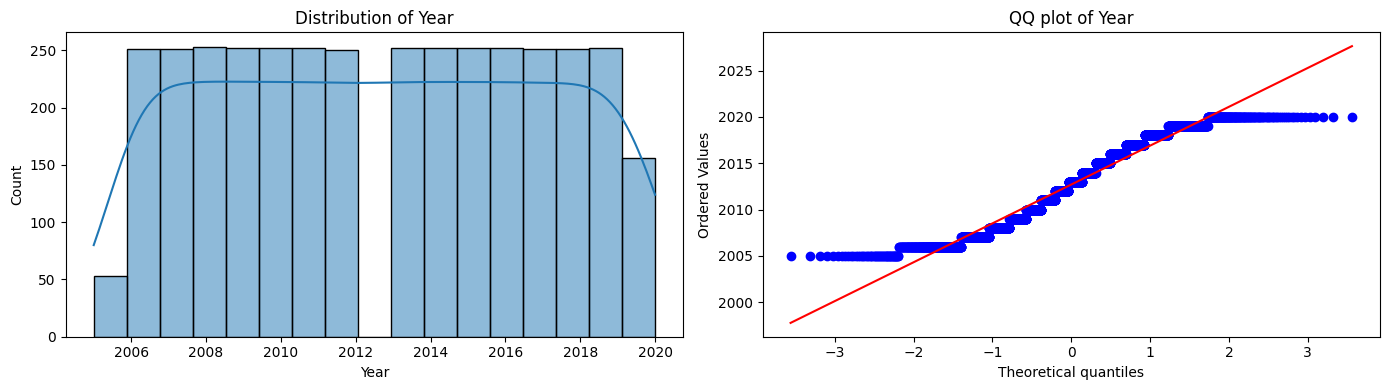

Skewness of Month: 0.005020000829793366


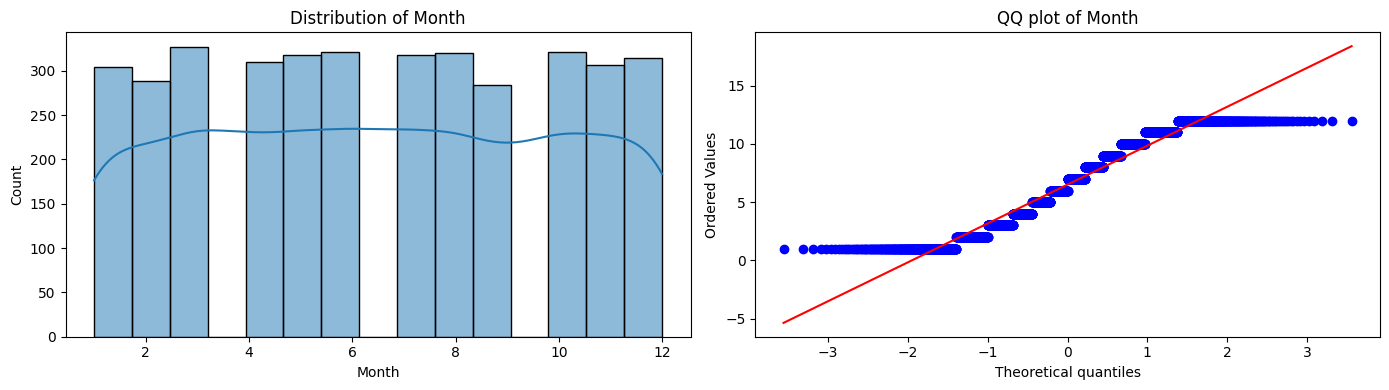

Skewness of QQQ_Close: 0.9991579335496368


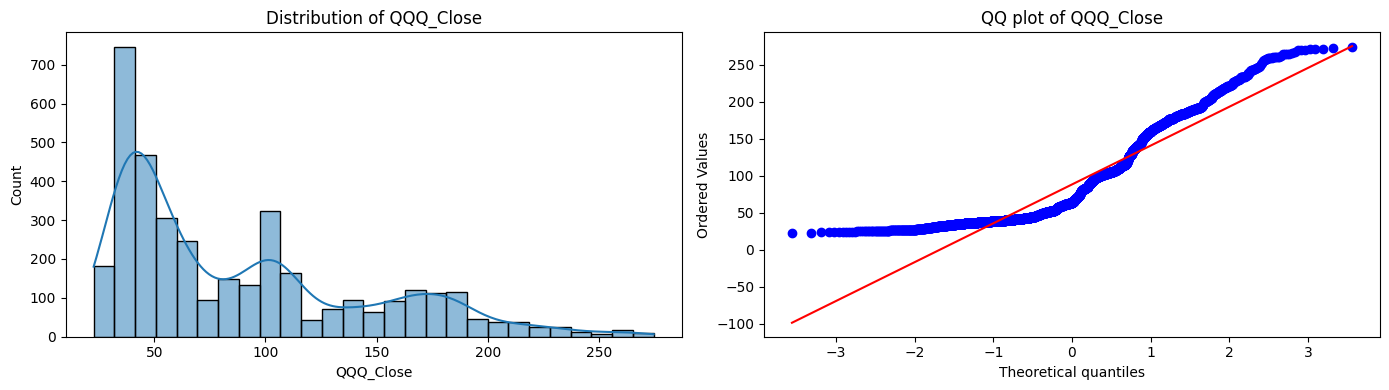

Skewness of QQQ(t-1): 0.996811148404355


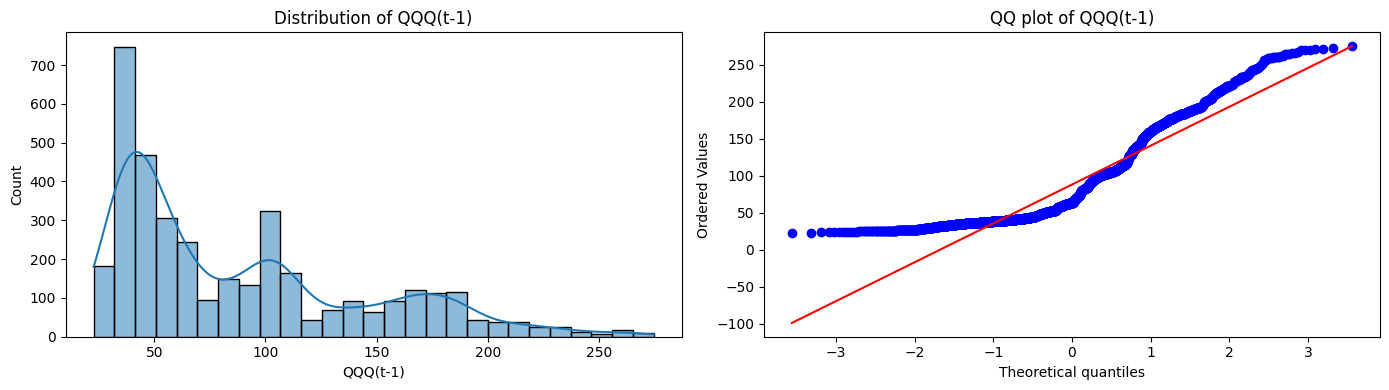

Skewness of QQQ(t-2): 0.9944809275069998


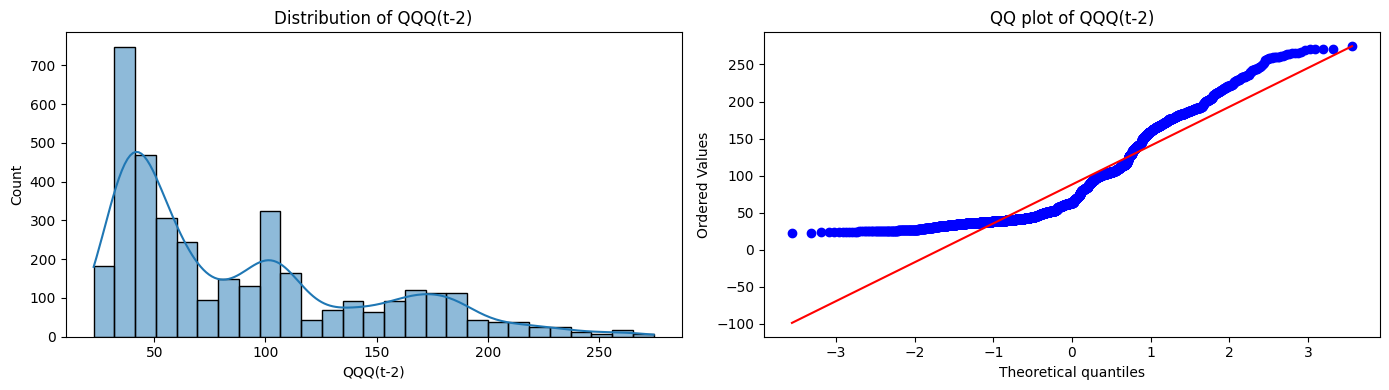

Skewness of QQQ(t-5): 0.9880482958485425


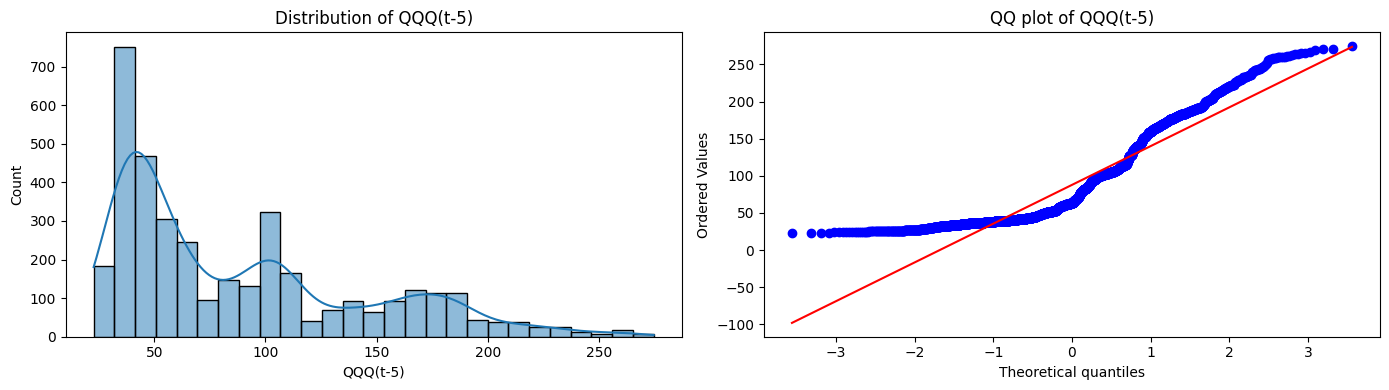

Skewness of QQQ_MA10: 0.9864135262569151


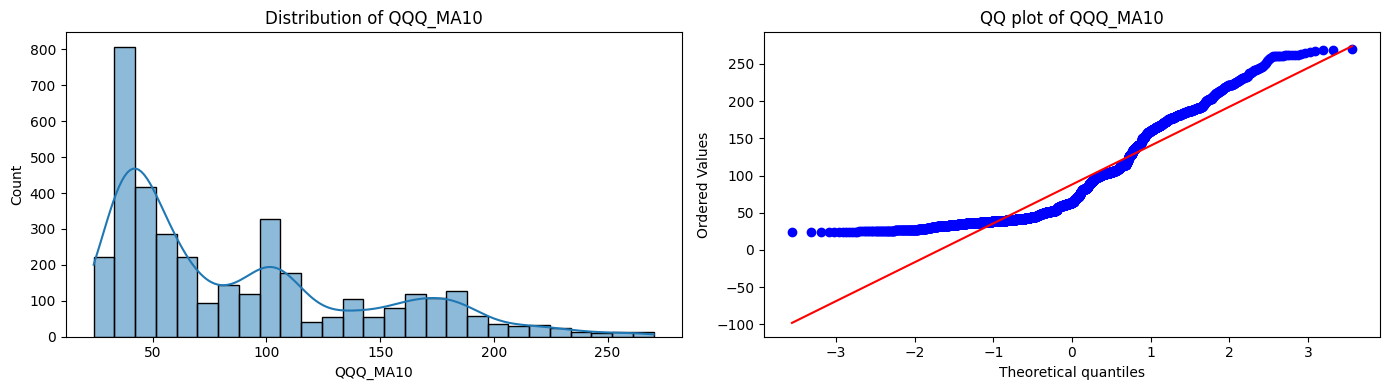

Skewness of QQQ_MA20: 0.9737940568437001


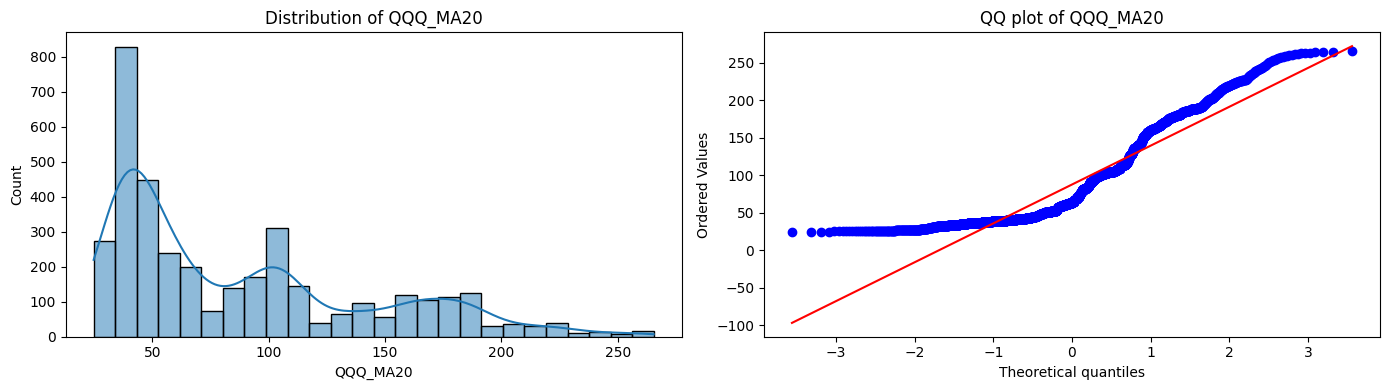

Skewness of QQQ_MA50: 0.9390664874394192


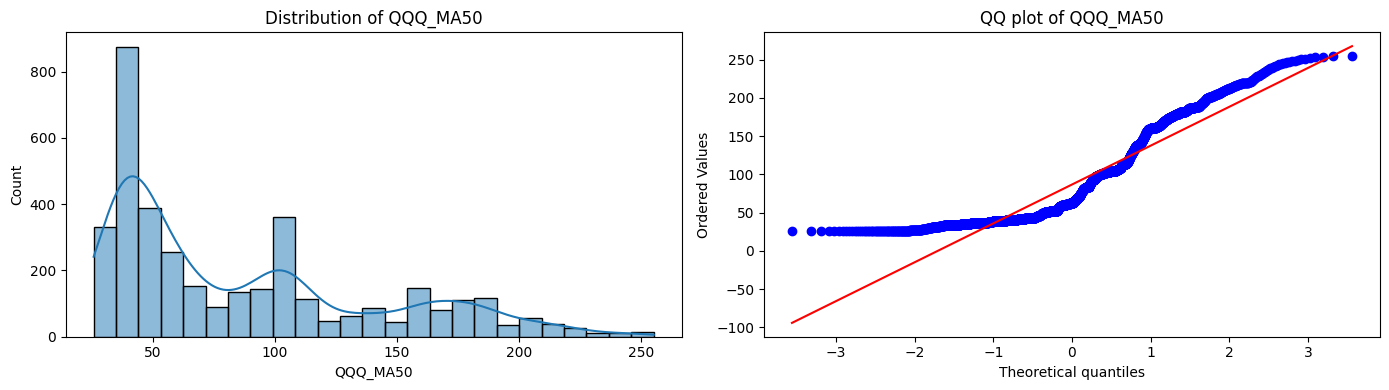

Skewness of SnP_Close: 0.5761077259930535


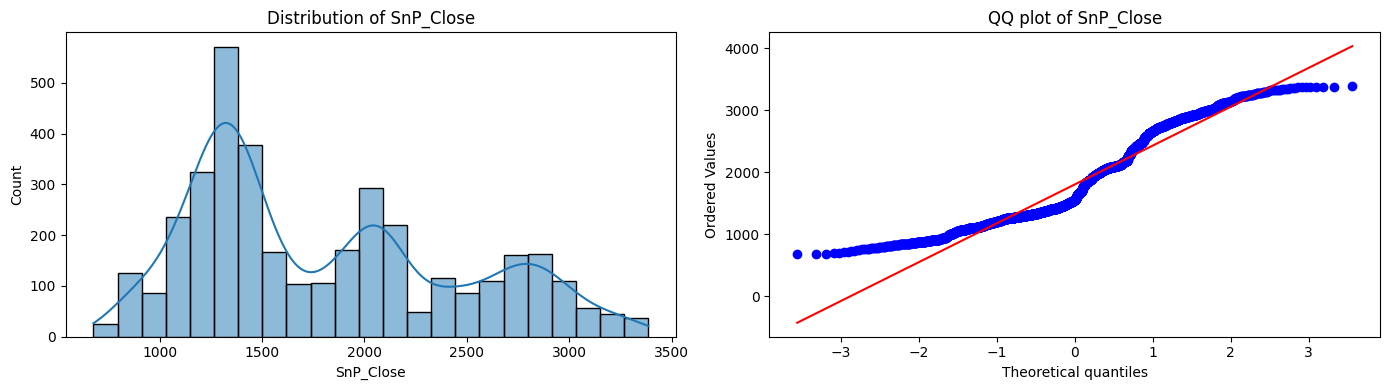

Skewness of SnP(t-1)): 0.5759397714285587


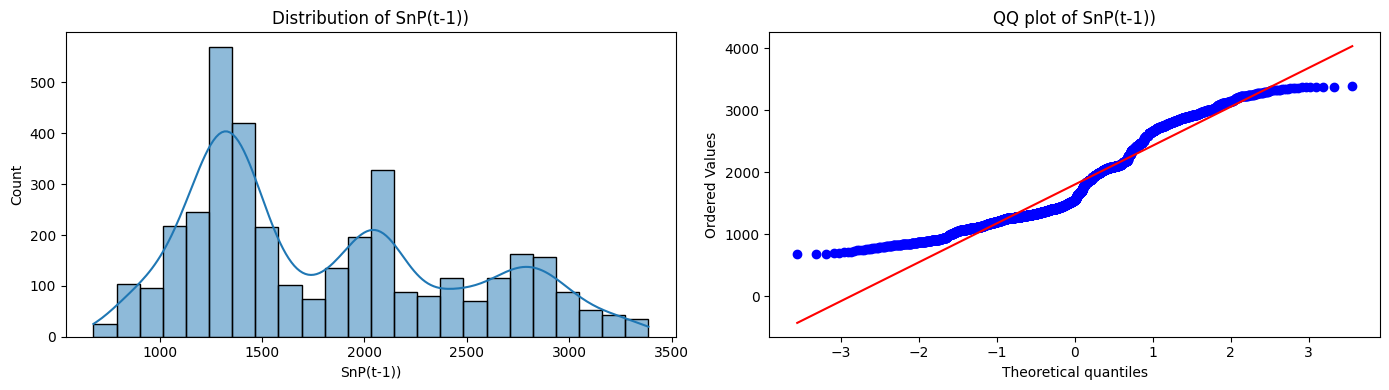

Skewness of SnP(t-5): 0.5754704791705458


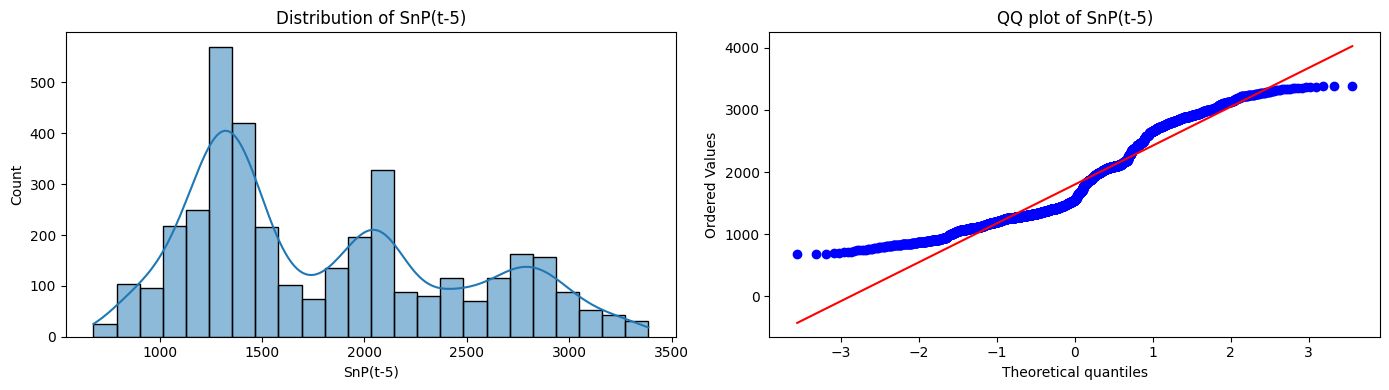

Skewness of DJIA_Close: 0.6677602109679106


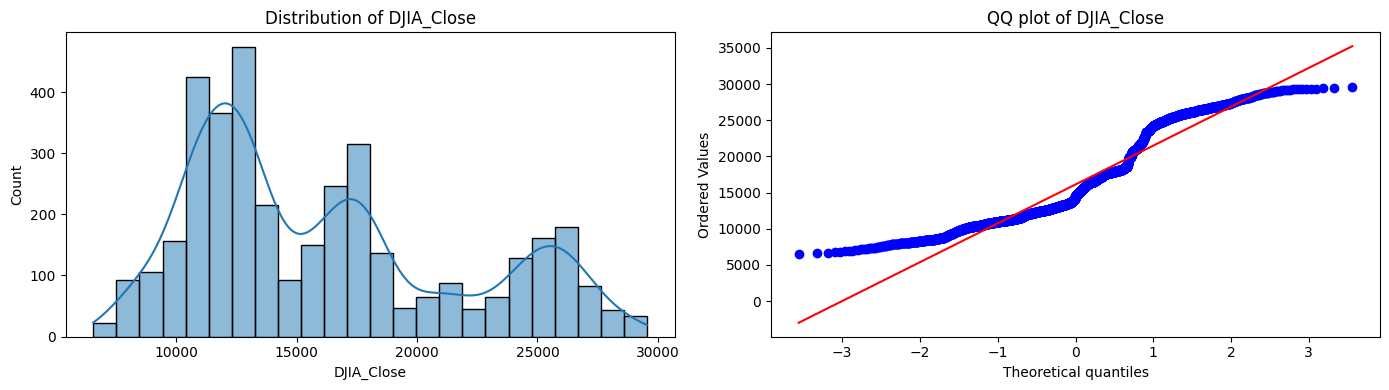

Skewness of DJIA(t-1)): 0.6683905699324642


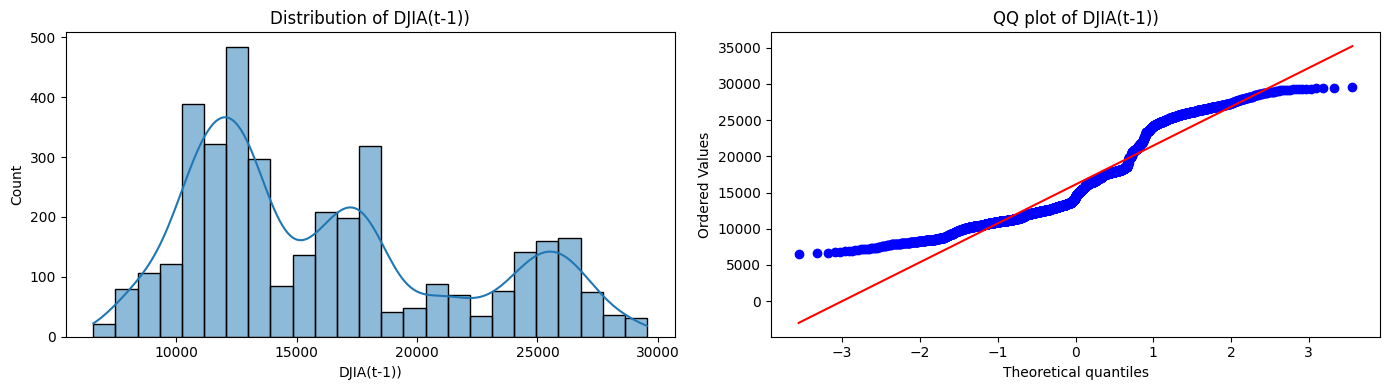

Skewness of DJIA(t-5): 0.6710606780234848


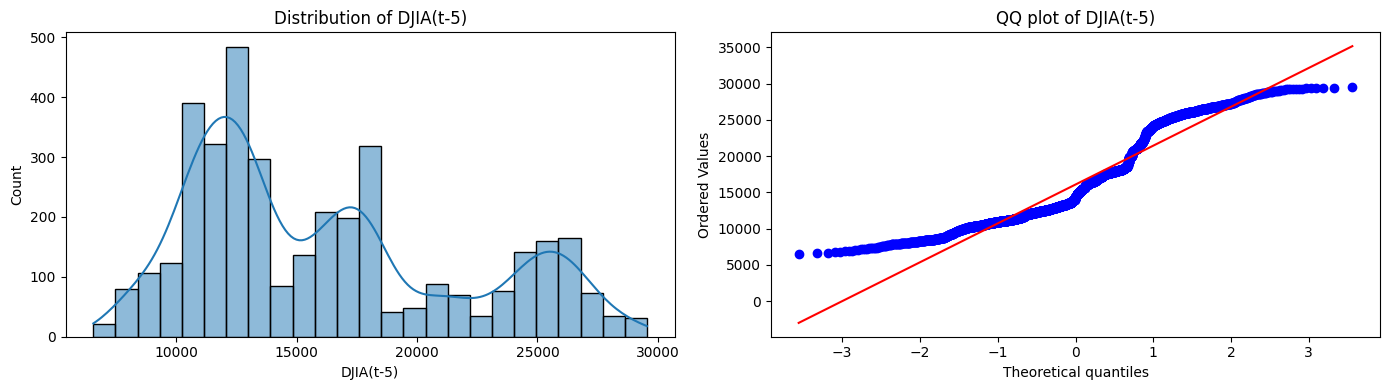

Skewness of Close_forcast: 1.4403572047043245


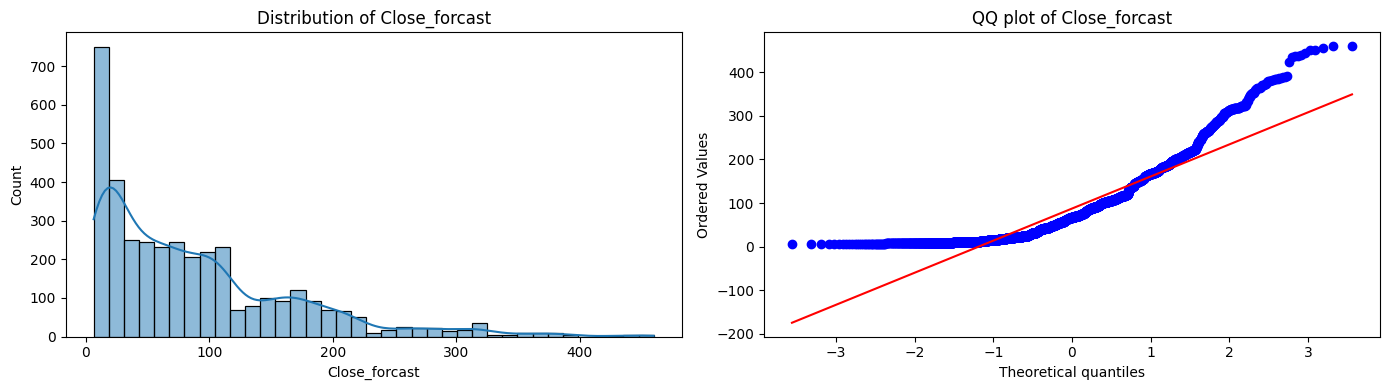

In [56]:
for col in df.columns:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')
    
    plt.figure(figsize=(14, 4))

    # Distribution plot
    plt.subplot(121)
    sns.histplot(df[col], kde=True)  # Changed to histplot
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(122)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'QQ plot of {col}')

    plt.tight_layout()
    plt.show()

### Outlier detection

> Note : In stock market prediction outliers represent the most important information so we'll not remove the outliers

### Correlation of of first 17 features with `Close_forecast`

In [97]:
df.columns

Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
       'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close',
       'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [8]:
import pandas as pd
import plotly.express as px

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                color_continuous_scale=px.colors.diverging.Tealrose,
                zmin=-1, zmax=1,
                title="Correlation Matrix of Numerical Features")

# Update layout for better appearance
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='darkblue'),
    xaxis_title="",
    yaxis_title="",
    xaxis=dict(tickangle=90, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    yaxis=dict(tickangle=0, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    font=dict(family="Arial", size=12, color="black"),
    coloraxis_colorbar=dict(
        title="Correlation Coefficient",
        thickness=15,
        len=0.75,
        xpad=10
    ),
    width=1200,  # Adjust width as needed
    height=1000  # Adjust height as needed
)

# Add annotations to show correlation values with one decimal point
fig.update_traces(text=corr_matrix.round(1).values,
                texttemplate="%{text}",
                textfont_size=10,
                colorbar_title="Correlation Coefficient")

# Display the heatmap
fig.show()


### Drop all the irrelevent features

In [19]:
df.drop(columns=['Day', 'DayofWeek', 'DayofYear', 'Week',
    'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
    'Is_year_end', 'Is_year_start','Month'],inplace=True)

In [17]:
df.shape

(3732, 51)

### Applyinh ML model

### Separate the dependent and independent features

In [32]:
x = df.drop('Close_forcast',axis=1)
y = df['Close_forcast']

### Splitting the data into train and test

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2985, 50), (747, 50), (2985,), (747,))

### Applying RobustScaler on it

In [22]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Now x_train_scaled and x_test_scaled are the scaled versions of your features


In [23]:
x_train = pd.DataFrame(x_train,columns=x.columns)

In [24]:
x_train.head()

Open      High       Low  Close(t)    Volume      SD20  Upper_Band  \
0  0.569072  0.565235  0.576644  0.576927 -0.491706  0.669459    0.515691   
1  1.236713  1.225990  1.236191  1.235645 -0.522212  2.189483    1.243698   
2 -0.102328 -0.104439 -0.099211 -0.098525 -0.045218  0.208841   -0.126370   
3  0.256865  0.252334  0.255760  0.249869 -0.451289  0.019690    0.248879   
4  0.427065  0.434661  0.433246  0.437193 -0.118117  0.994794    0.402001   

   Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  S_Close(t-5)  \
0    0.492300      0.571802      0.573690      0.502414      0.507870   
1    1.113146      1.232964      1.217296      1.240554      1.305352   
2   -0.142233     -0.103992     -0.111845     -0.116289     -0.114900   
3    0.273924      0.253554      0.251153      0.267842      0.268416   
4    0.339721      0.428930      0.427987      0.416142      0.397901   

   S_Open(t-1)       MA5      MA10      MA20      MA50     MA200     EMA10  \
0     0.565158  0.545910  0.518806  0.497534  0.449962  0.421162  0.550561   
1     1.234507  1.238035  1.236056  1.177264  1.065791  1.339118  1.232453   
2    -0.112342 -0.109232 -0.121603 -0.144427 -0.178408 -0.171439 -0.110463   
3     0.251019  0.259513  0.257004  0.252889  0.265979  0.388548  0.253941   
4     0.426272  0.428485  0.395838  0.364220  0.364806  0.310671  0.419988   

      EMA20     EMA50    EMA100    EMA200      MACD  MACD_EMA       ATR  \
0  0.550561  0.550561  0.550561  0.550561  1.596333  1.137262  0.194823   
1  1.232453  1.232453  1.232453  1.232453  3.058281  3.211734  1.586654   
2 -0.110463 -0.110463 -0.110463 -0.110463  1.016000  0.871113 -0.293677   
3  0.253941  0.253941  0.253941  0.253941 -0.204605 -0.239469  0.207507   
4  0.419988  0.419988  0.419988  0.419988  1.066409  0.402971  0.908077   

        ADX  CCI       ROC       RSI  William%R      SO%K      STD5  \
0  1.030118  0.0  0.784328  1.483838   0.383107  0.383107  1.127733   
1  0.816839 -1.0  0.156997  0.379739  -0.142653 -0.142653 -0.203342   
2  1.637442 -1.0  1.296643  1.132562   0.561681  0.561681 -0.650019   
3 -0.412072  0.0 -0.367747 -0.505575  -1.061418 -1.061418 -0.465093   
4 -0.538230  0.0  0.987485  0.381249   0.480013  0.480013  0.221683   

   ForceIndex1  ForceIndex20  Is_leap_year      Year  QQQ_Close  QQQ(t-1)  \
0     0.116519      0.449226           0.0  0.571429   0.765929  0.761562   
1     0.024442      0.513552           0.0  0.857143   1.492002  1.486739   
2     0.528317      0.839939           1.0 -0.142857  -0.103572 -0.104758   
3    -0.139624      0.014812           1.0  0.428571   0.522261  0.526589   
4     0.656412      1.738784           0.0  0.285714   0.442815  0.444356   

   QQQ(t-2)  QQQ(t-5)  QQQ_MA10  QQQ_MA20  QQQ_MA50  SnP_Close  SnP(t-1))  \
0  0.764352  0.773416  0.769913  0.767574  0.745220   0.740543   0.722733   
1  1.504539  1.558221  1.518008  1.506982  1.466376   1.274358   1.262690   
2 -0.104406 -0.121935 -0.109472 -0.121127 -0.146442  -0.238806  -0.241350   
3  0.527503  0.561034  0.555876  0.557324  0.565567   0.507734   0.511154   
4  0.432710  0.422216  0.449622  0.451397  0.477615   0.476829   0.485120   

   SnP(t-5)  DJIA_Close  DJIA(t-1))  DJIA(t-5)  
0  0.754996    0.660349    0.637811   0.678252  
1  1.337496    1.354571    1.344098   1.405255  
2 -0.266403   -0.224122   -0.228307  -0.245981  
3  0.572434    0.361401    0.365899   0.419506  
4  0.450816    0.365441    0.364864   0.318709

## LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  5.484243669758289
r2_score is :  0.9991349406417358
mean_absolute_error is :  1.1021468168671578


## RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model=RandomForestRegressor(n_estimators=400,          # Number of trees in the forest
max_depth=10,              # Maximum depth of the treemin_samples_split=5,      # Minimum number of samples required to split an internal node
min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
max_features='log2',       # Number of features to consider when looking for the best split
bootstrap=True,            # Whether to use bootstrap samples when building trees
random_state=42

)
model.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
mse=mean_squared_error(y_pred_rf,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred_rf,y_test)
mae = mean_absolute_error(y_pred_rf,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

# # Perform 5-fold cross-validation
# scores = cross_val_score(model, x, y, cv=5)
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", scores.mean())

mean squared error is  :  5.394712933433218
r2_score is :  0.999147885201758
mean_absolute_error is :  1.1614917764800008


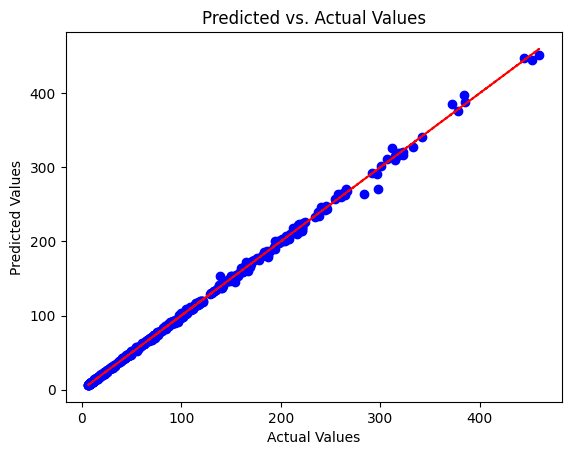

In [49]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

### GradientBoostingRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(
    n_estimators=200,     
    learning_rate=0.05,   
    max_depth=5,        
    min_samples_split=10,    
    min_samples_leaf=3,
    subsample=0.8,    
    max_features='sqrt',   
    random_state=42
)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  4.17785471187075
r2_score is :  0.9993395681799172
mean_absolute_error is :  1.0883510023799061


## Model Loading and Saving

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
import pickle

# Save the model to a file using joblib
model = GradientBoostingRegressor(
    n_estimators=200,     
    learning_rate=0.05,   
    max_depth=5,        
    min_samples_split=10,    
    min_samples_leaf=3,
    subsample=0.8,    
    max_features='sqrt',   
    random_state=42
    
)

model.fit(x_train,y_train)


# Save the model using pickle
from sklearn.ensemble import GradientBoostingRegressor
import pickle
with open('GradientBoostingStockMarket.pkl', 'wb') as f:
    pickle.dump(model, f)


# # Load your trained model
with open('GradientBoostingStockMarket.pkl', 'rb') as f:
    model = pickle.load(f)
    model


In [ ]:
# 

# # Now `model` will have the `predict()` method

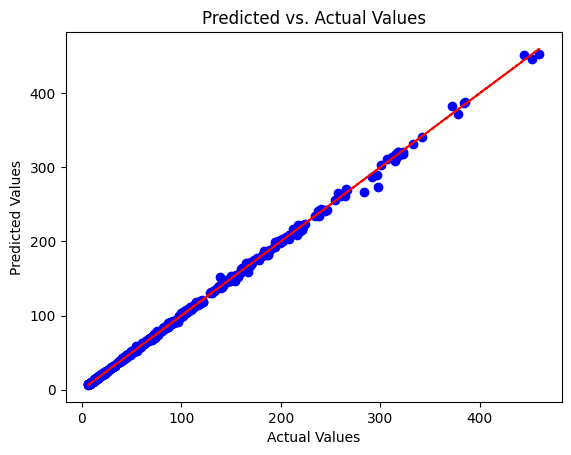

In [75]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

### DecisionTreeRegressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model on training data
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

# Print the evaluation metrics
print("mean squared error is  : ", mse)
print("r2_score is : ", score)
print("mean_absolute_error is : ", mae)

mean squared error is  :  9.42769410977243
r2_score is :  0.9985091426621282
mean_absolute_error is :  1.4882329317269076


### AdaboostRegressor

In [41]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

# Fit the model on training data
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

# Print the evaluation metrics
print("mean squared error is  : ", mse)
print("r2_score is : ", score)
print("mean_absolute_error is : ", mae)

mean squared error is  :  32.733621790514384
r2_score is :  0.9946231684727687
mean_absolute_error is :  4.541416926287566


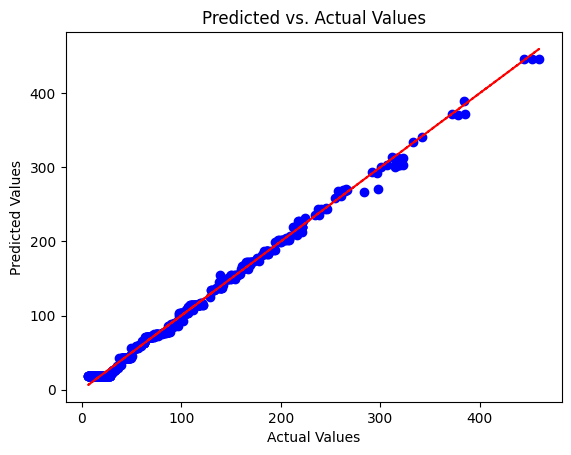

In [42]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()